# Time Series Analysis

### Import the Packages

In [1]:
import os
import csv
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy
import statsmodels

In [2]:
# matplotlib configuration

plt.rcParams["font.family"] = "serif"
plt.rcParams["savefig.dpi"] = 300
plt.rcParams["figure.dpi"] = 150
plt.rcParams['figure.figsize'] = 20, 10

def newfigure(*args, **kwargs):
    fig, ax = plt.subplots(*args, **kwargs)
    for i, a in enumerate(fig.axes):
        a.tick_params(direction='in', top=True, right=True)
        a.grid(which='major', axis='both', linestyle=":")
    return fig, ax

### Import the Data

In [3]:
file_data = []
print(os.listdir())

weather = pd.read_csv(
    "weather.csv",
    parse_dates=['Timestamp'],
    index_col=["Timestamp"])

weather = weather[~weather.index.duplicated()]

weather.head()

['.ipynb_checkpoints', 'alldata.csv', 'COPY.ipynb', 'Data_Analysis.ipynb', 'music.csv', 'Music.ipynb', 'weather.csv', 'Weather.ipynb']


Temperature  Feels like  Min temp  Max temp  Pressure  \
Timestamp                                                                    
2019-12-20 00:00:00         9.06        4.92      7.78      10.0       989   
2019-12-20 00:10:00         9.06        4.92      7.78      10.0       989   
2019-12-20 00:20:00         8.81        6.02      7.78      10.0       988   
2019-12-20 00:30:00         8.81        6.02      7.78      10.0       988   
2019-12-20 00:40:00         8.66        5.83      7.22      10.0       988   

                     Humidity  
Timestamp                      
2019-12-20 00:00:00        81  
2019-12-20 00:10:00        81  
2019-12-20 00:20:00        81  
2019-12-20 00:30:00        81  
2019-12-20 00:40:00        81

In [4]:
music = pd.read_csv(
    "music.csv",
    parse_dates=['Timestamp'],
    index_col=["Timestamp"])

music = music[~music.index.duplicated()]

music.head()

Energy    Tempo  Loudness  Danceability  Acousticness  \
Timestamp                                                                    
2019-12-20 00:00:00   0.716  119.938    -5.211         0.836        0.0196   
2019-12-20 00:10:00   0.468  108.768    -7.790         0.813        0.1980   
2019-12-20 00:20:00   0.554  169.999    -5.290         0.726        0.0421   
2019-12-20 00:30:00   0.585   97.565   -10.332         0.442        0.0984   
2019-12-20 00:40:00   0.668   95.021    -5.898         0.695        0.1820   

                     Instrumentalness  
Timestamp                              
2019-12-20 00:00:00          0.000018  
2019-12-20 00:10:00          0.000000  
2019-12-20 00:20:00          0.000000  
2019-12-20 00:30:00          0.391000  
2019-12-20 00:40:00          0.000000

## Basic Plots

Plots of each variable vs. time across the one-week period.

### Weather Data

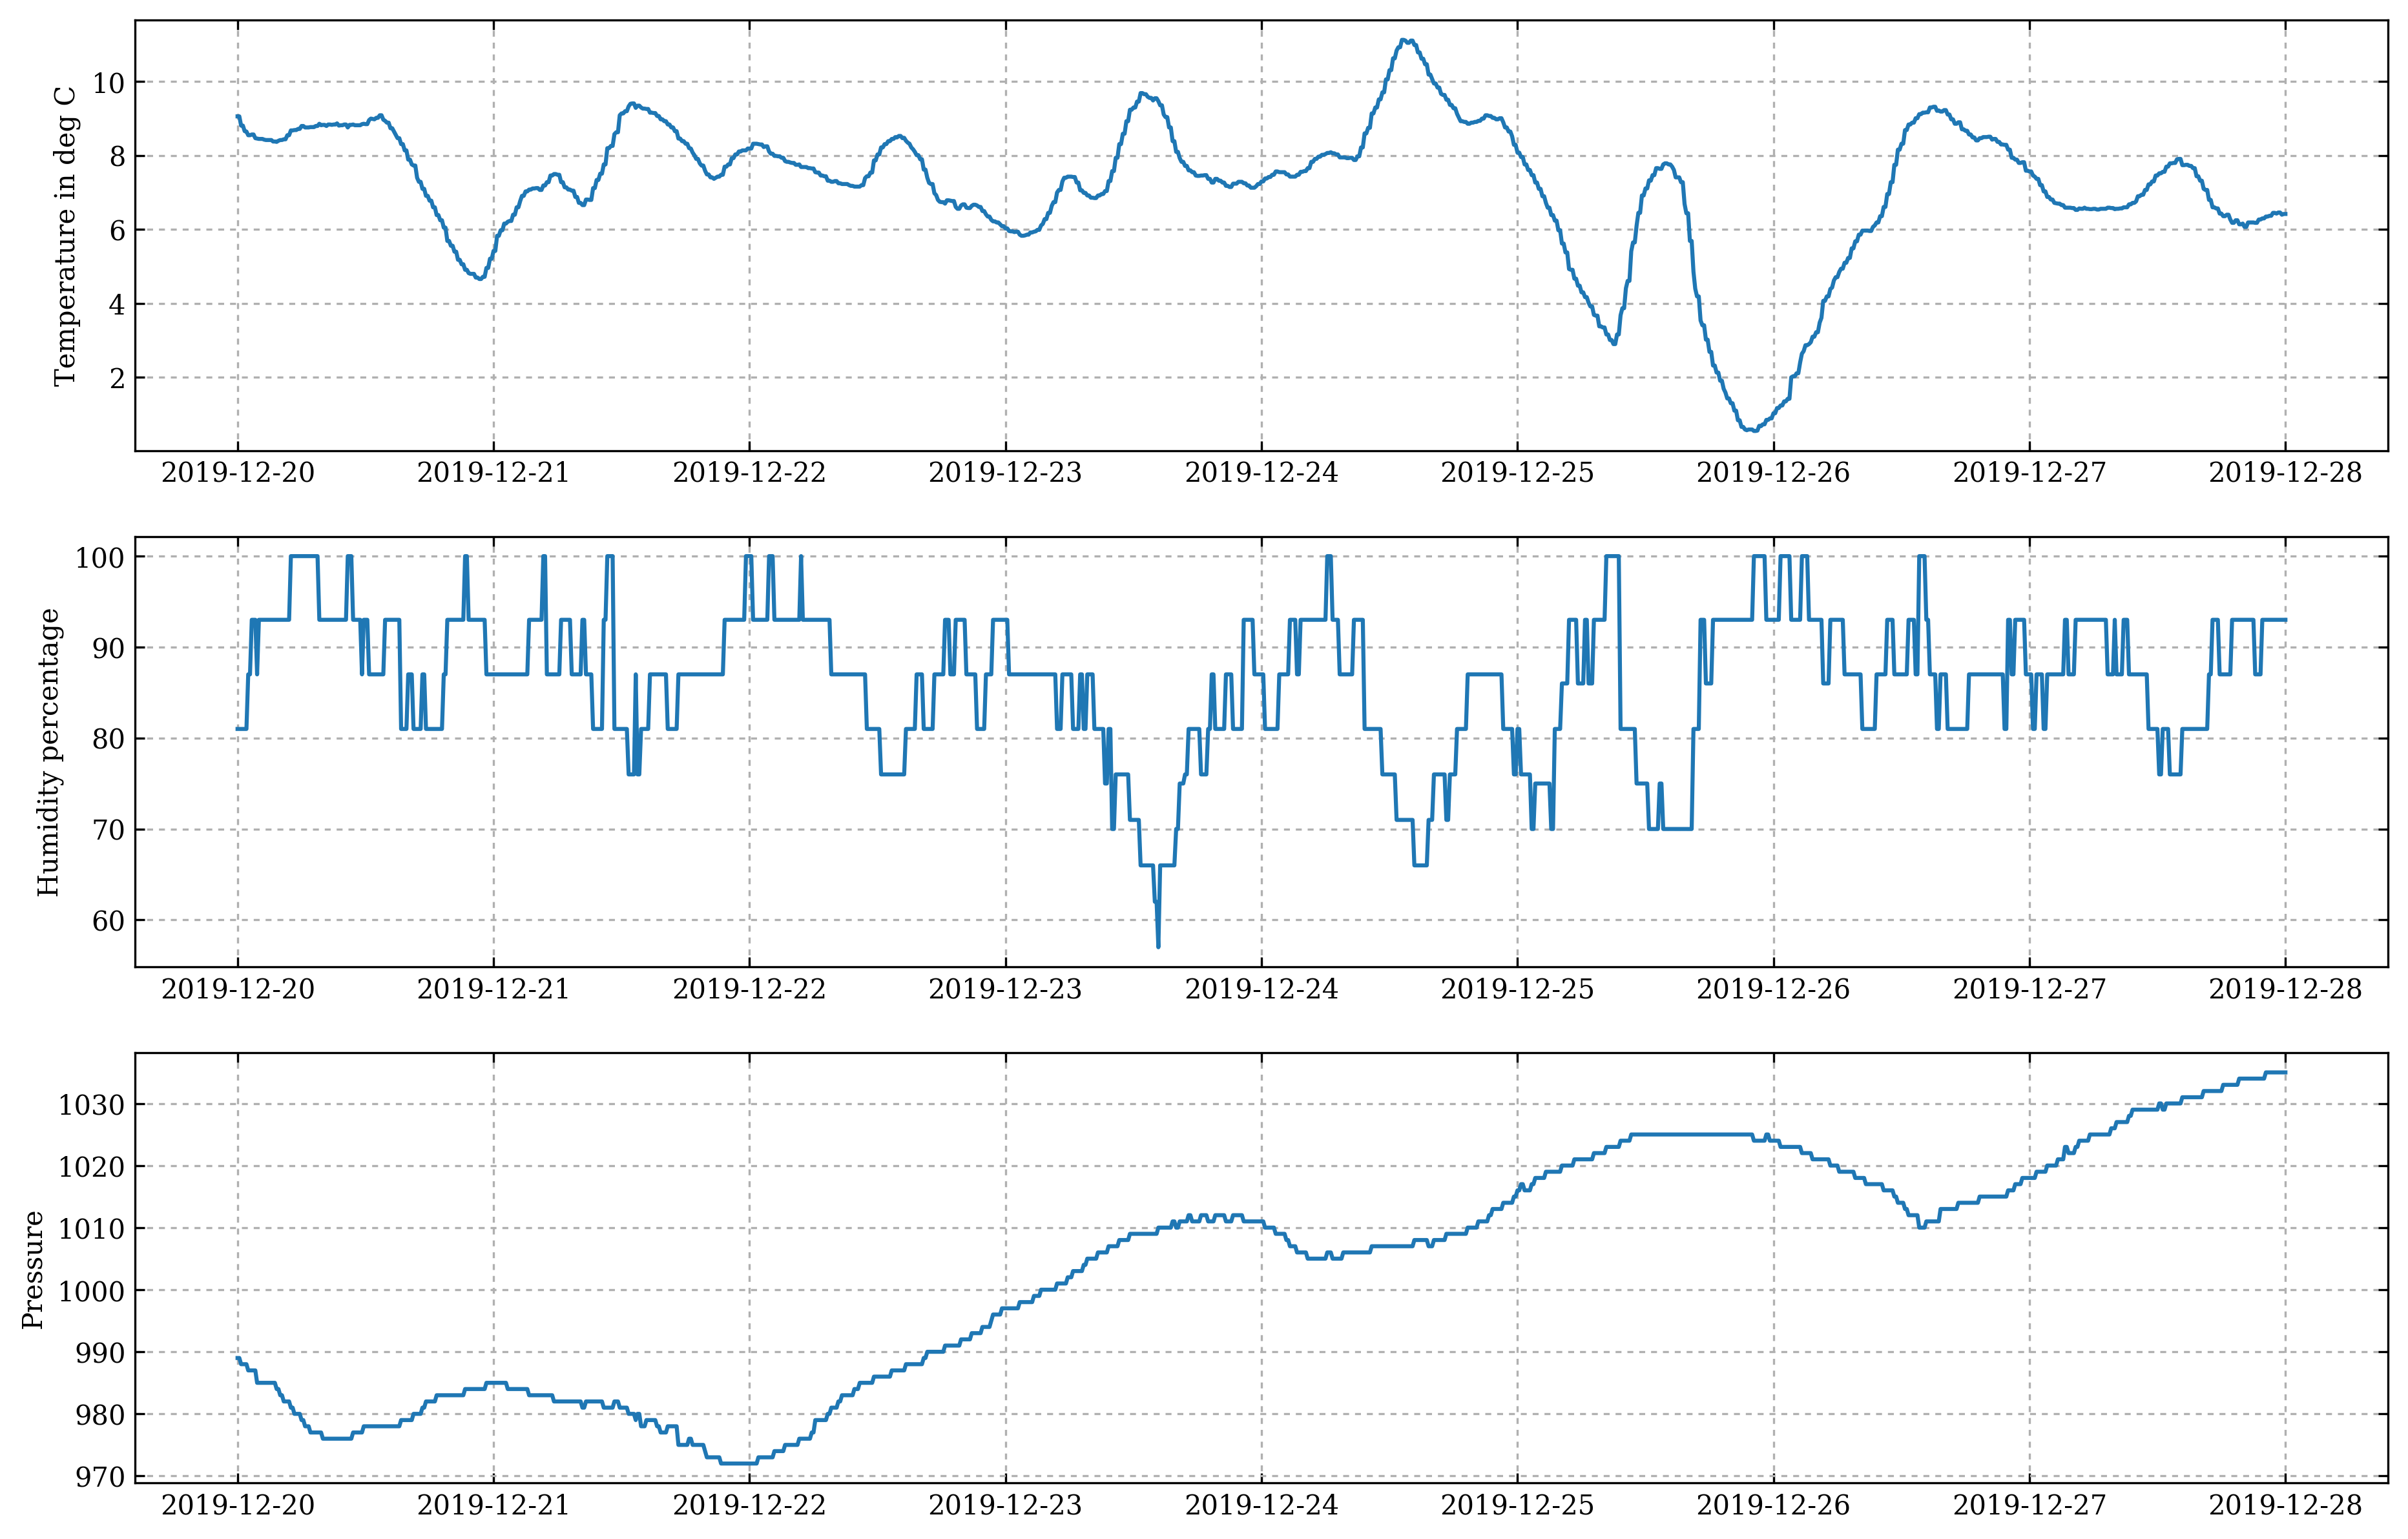

In [5]:
fig, ax = newfigure(3, figsize=(15,10))

ax[0].plot(weather['Temperature'])
ax[0].set_ylabel("Temperature in deg C")

ax[1].plot(weather['Humidity'])
ax[1].set_ylabel("Humidity percentage")

ax[2].plot(weather['Pressure'])
ax[2].set_ylabel("Pressure")

plt.show()

### Music Data

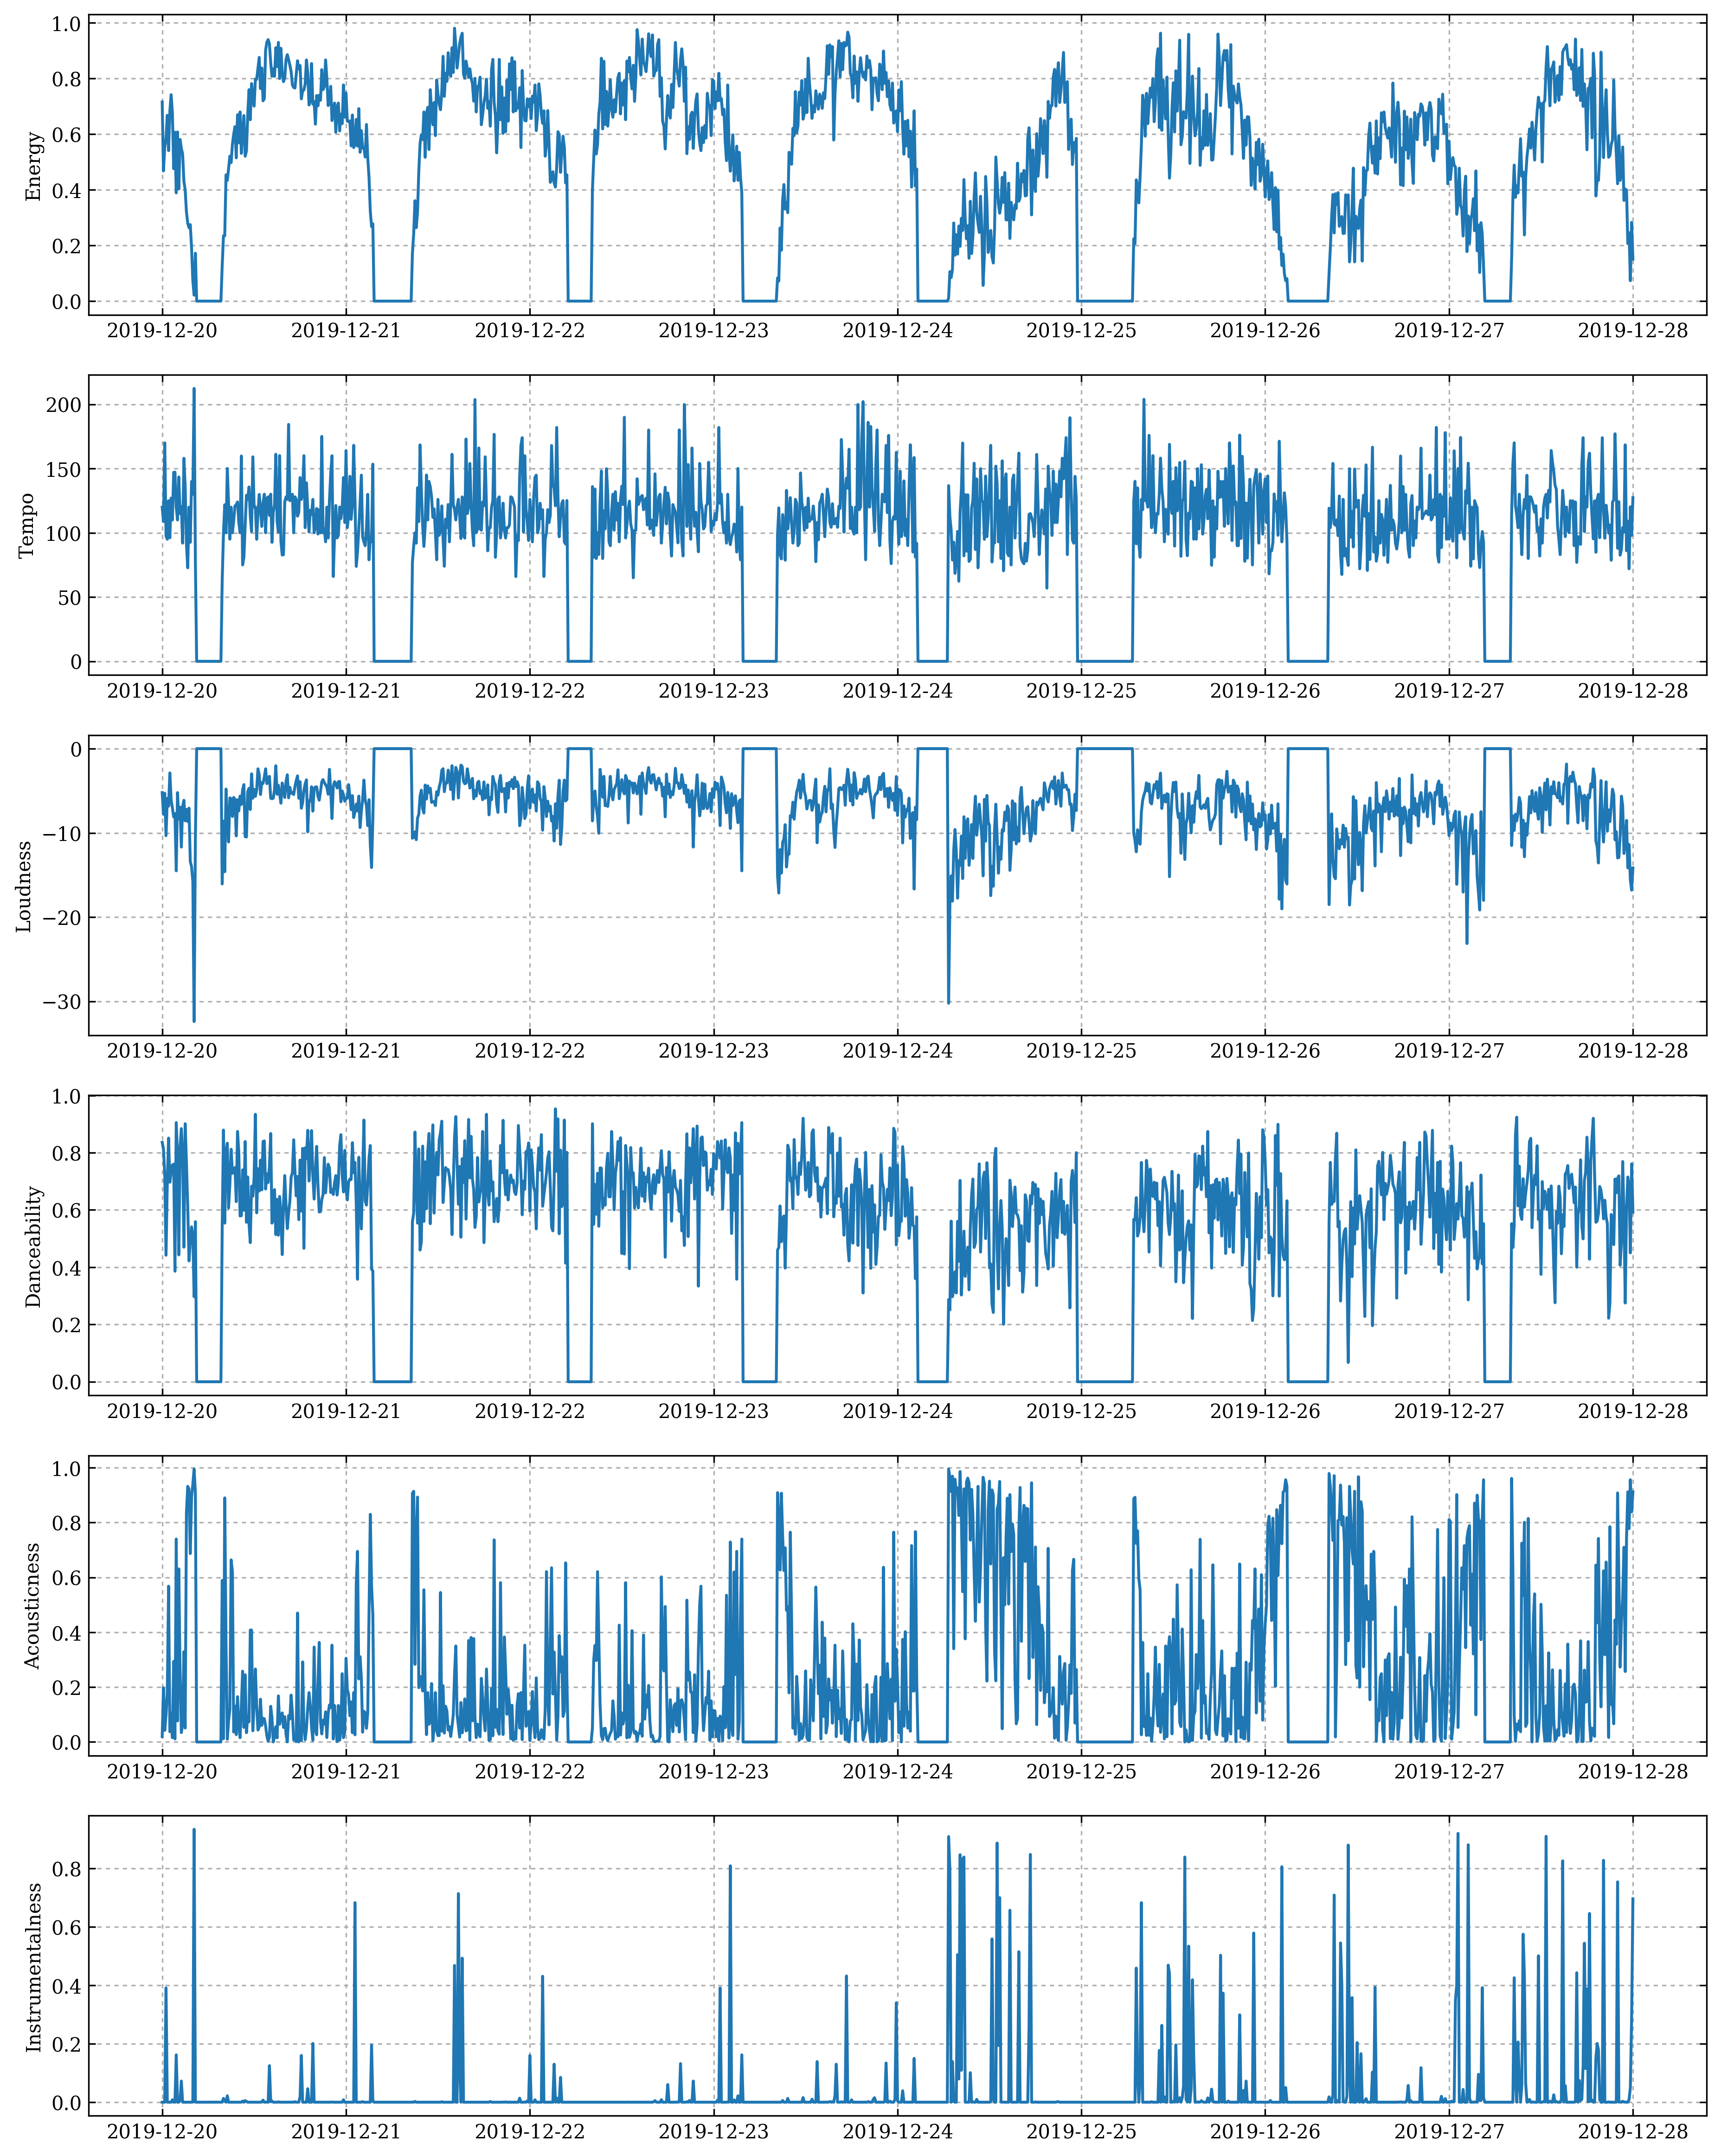

In [6]:
fig, ax = newfigure(6, figsize=(15,20))

ax[0].plot(music['Energy'])
ax[0].set_ylabel("Energy")

ax[1].plot(music['Tempo'])
ax[1].set_ylabel("Tempo")

ax[2].plot(music['Loudness'])
ax[2].set_ylabel("Loudness")

ax[3].plot(music['Danceability'])
ax[3].set_ylabel("Danceability")

ax[4].plot(music['Acousticness'])
ax[4].set_ylabel("Acousticness")

ax[5].plot(music['Instrumentalness'])
ax[5].set_ylabel("Instrumentalness")

plt.show()

## Normalised Data Comparisons

Directly comparing the datasets which indicate interesting patterns or correlation, using a normalised scale.

### Temperature and Humidity

                     Temperature  Humidity
Timestamp                                 
2019-12-20 00:00:00         9.06        81
2019-12-20 00:10:00         9.06        81
2019-12-20 00:20:00         8.81        81
2019-12-20 00:30:00         8.81        81
2019-12-20 00:40:00         8.66        81


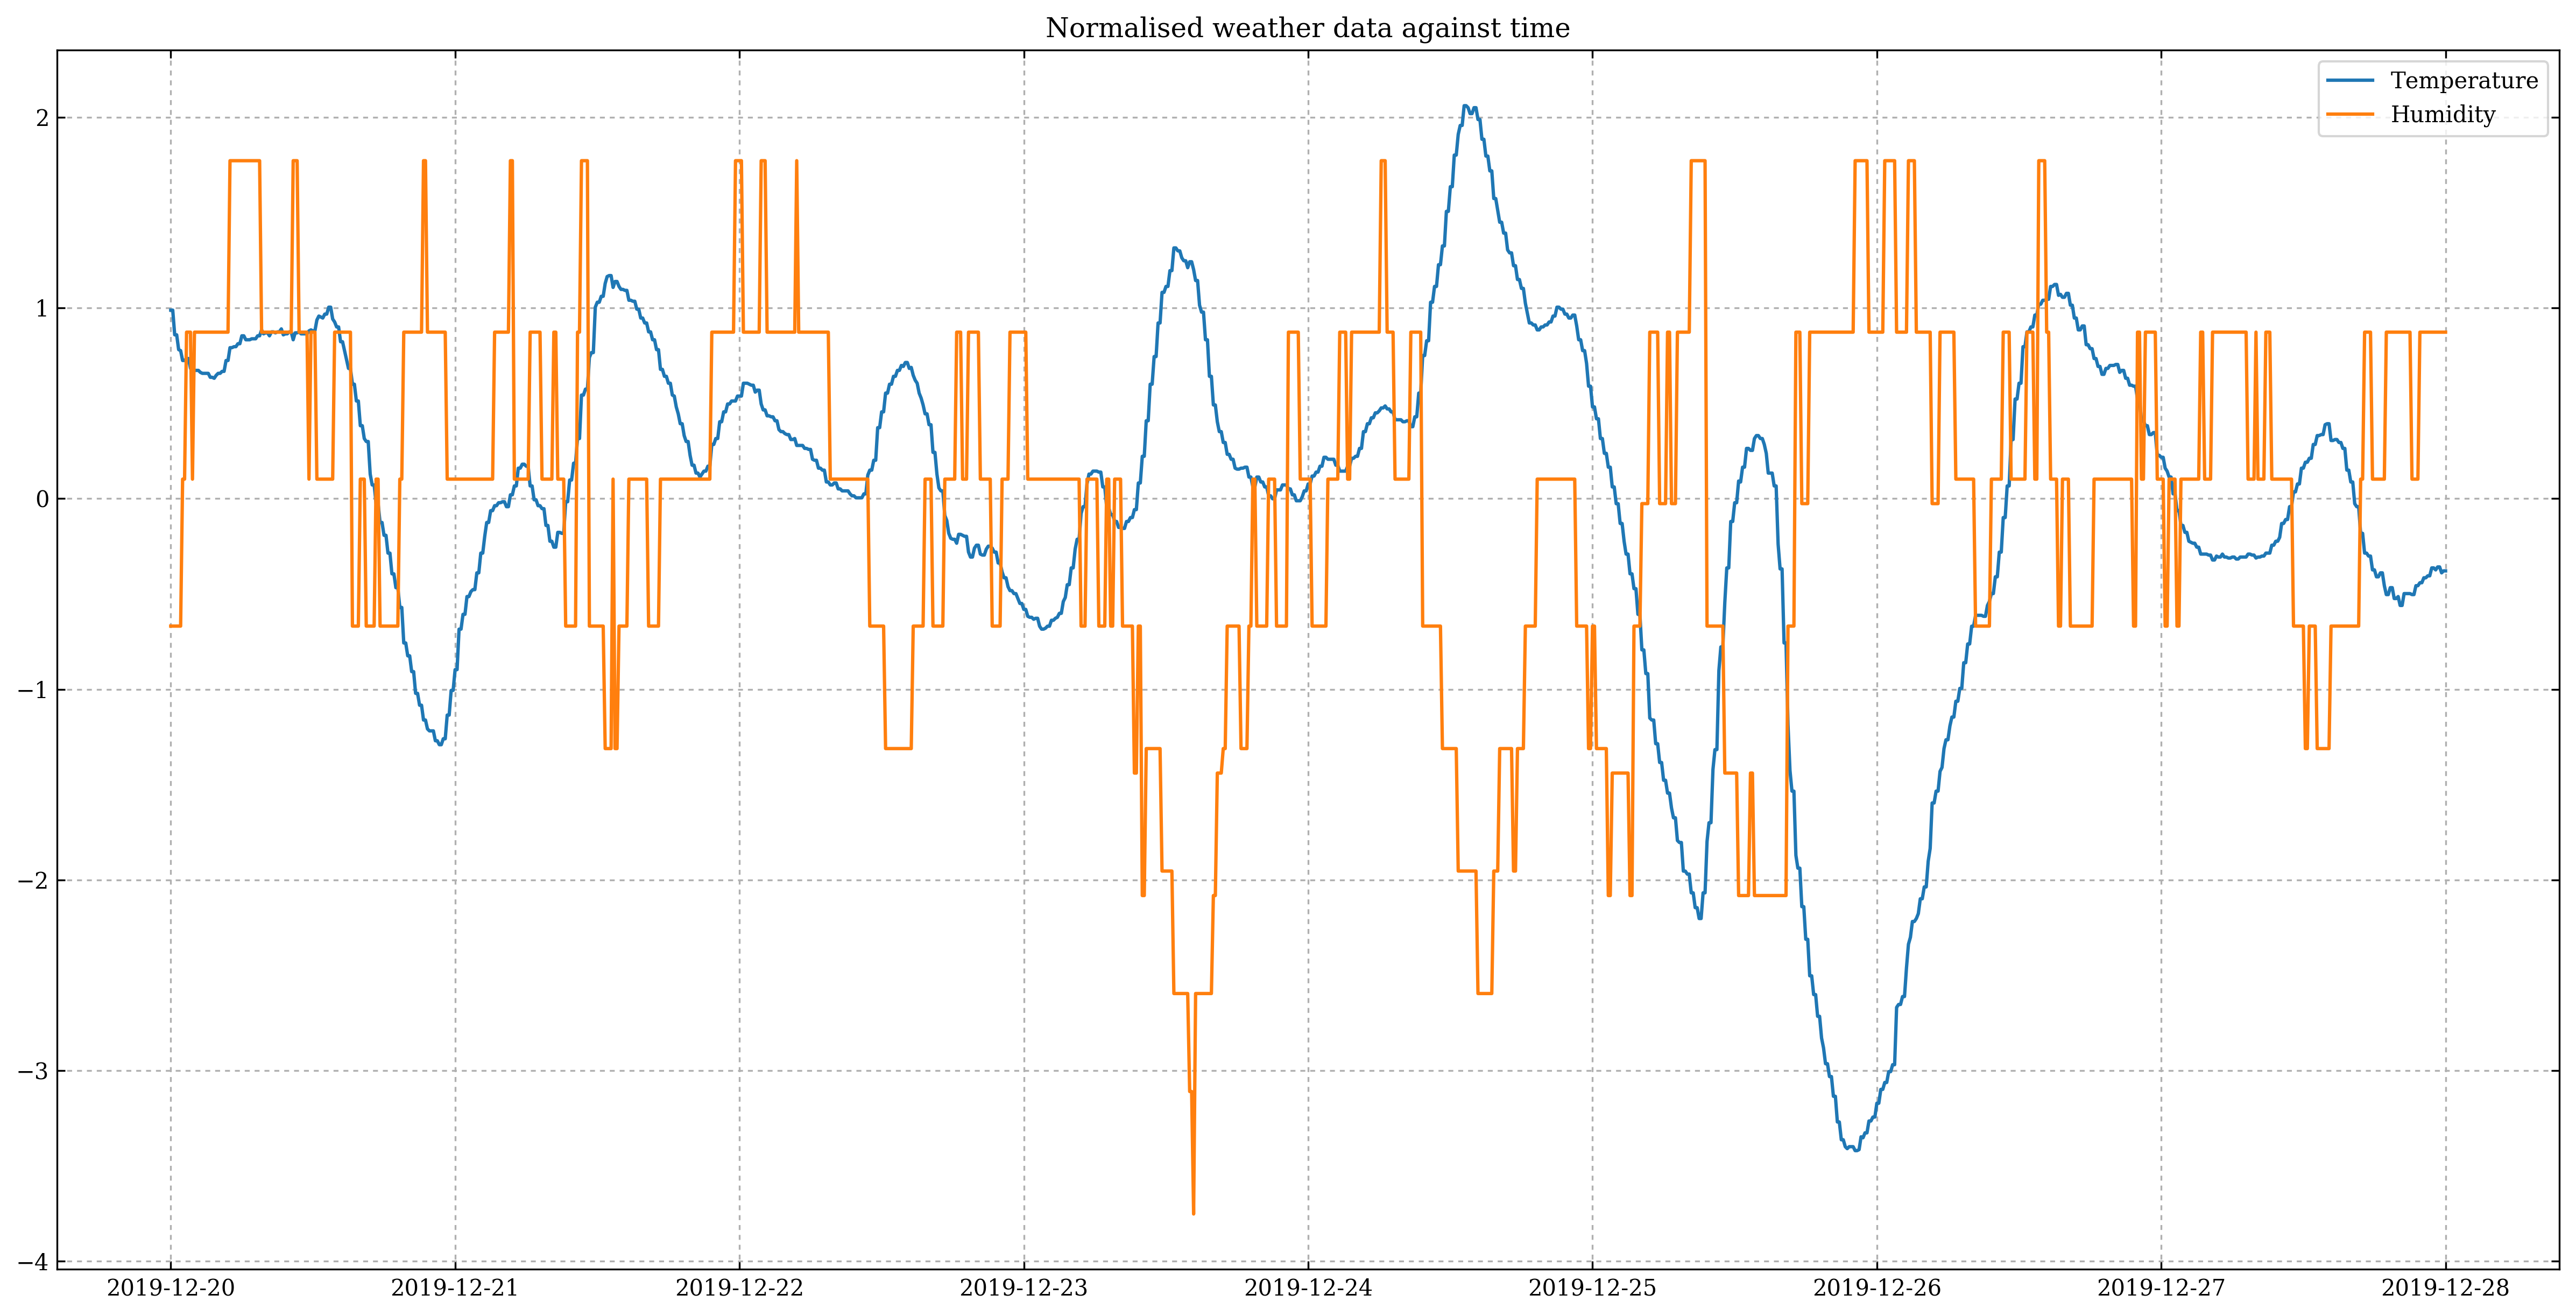

In [7]:
# remove unwanted datasets
cdata1 = pd.concat([weather['Temperature'],weather['Humidity']], axis=1)
print(cdata1.head())

# create new dataframes to store normalised data
ndata1 = cdata1.copy(deep=True)

stats = {}

for x in ndata1.columns.values:
    mean = np.mean(ndata1[x])
    stdv = np.std(ndata1[x])
    stats[x] = {"mean":mean,"stdv":stdv}
    ndata1[x] = (ndata1[x] - mean) / stdv
    
fig, axs = newfigure()

for x in ndata1.columns.values: 
    axs.plot(ndata1[x])

axs.set_title("Normalised weather data against time")
axs.legend()
plt.show()

### Temperature, Humidity and Music Energy

                     Temperature  Humidity  Energy
Timestamp                                         
2019-12-20 00:00:00         9.06        81   0.716
2019-12-20 00:10:00         9.06        81   0.468
2019-12-20 00:20:00         8.81        81   0.554
2019-12-20 00:30:00         8.81        81   0.585
2019-12-20 00:40:00         8.66        81   0.668


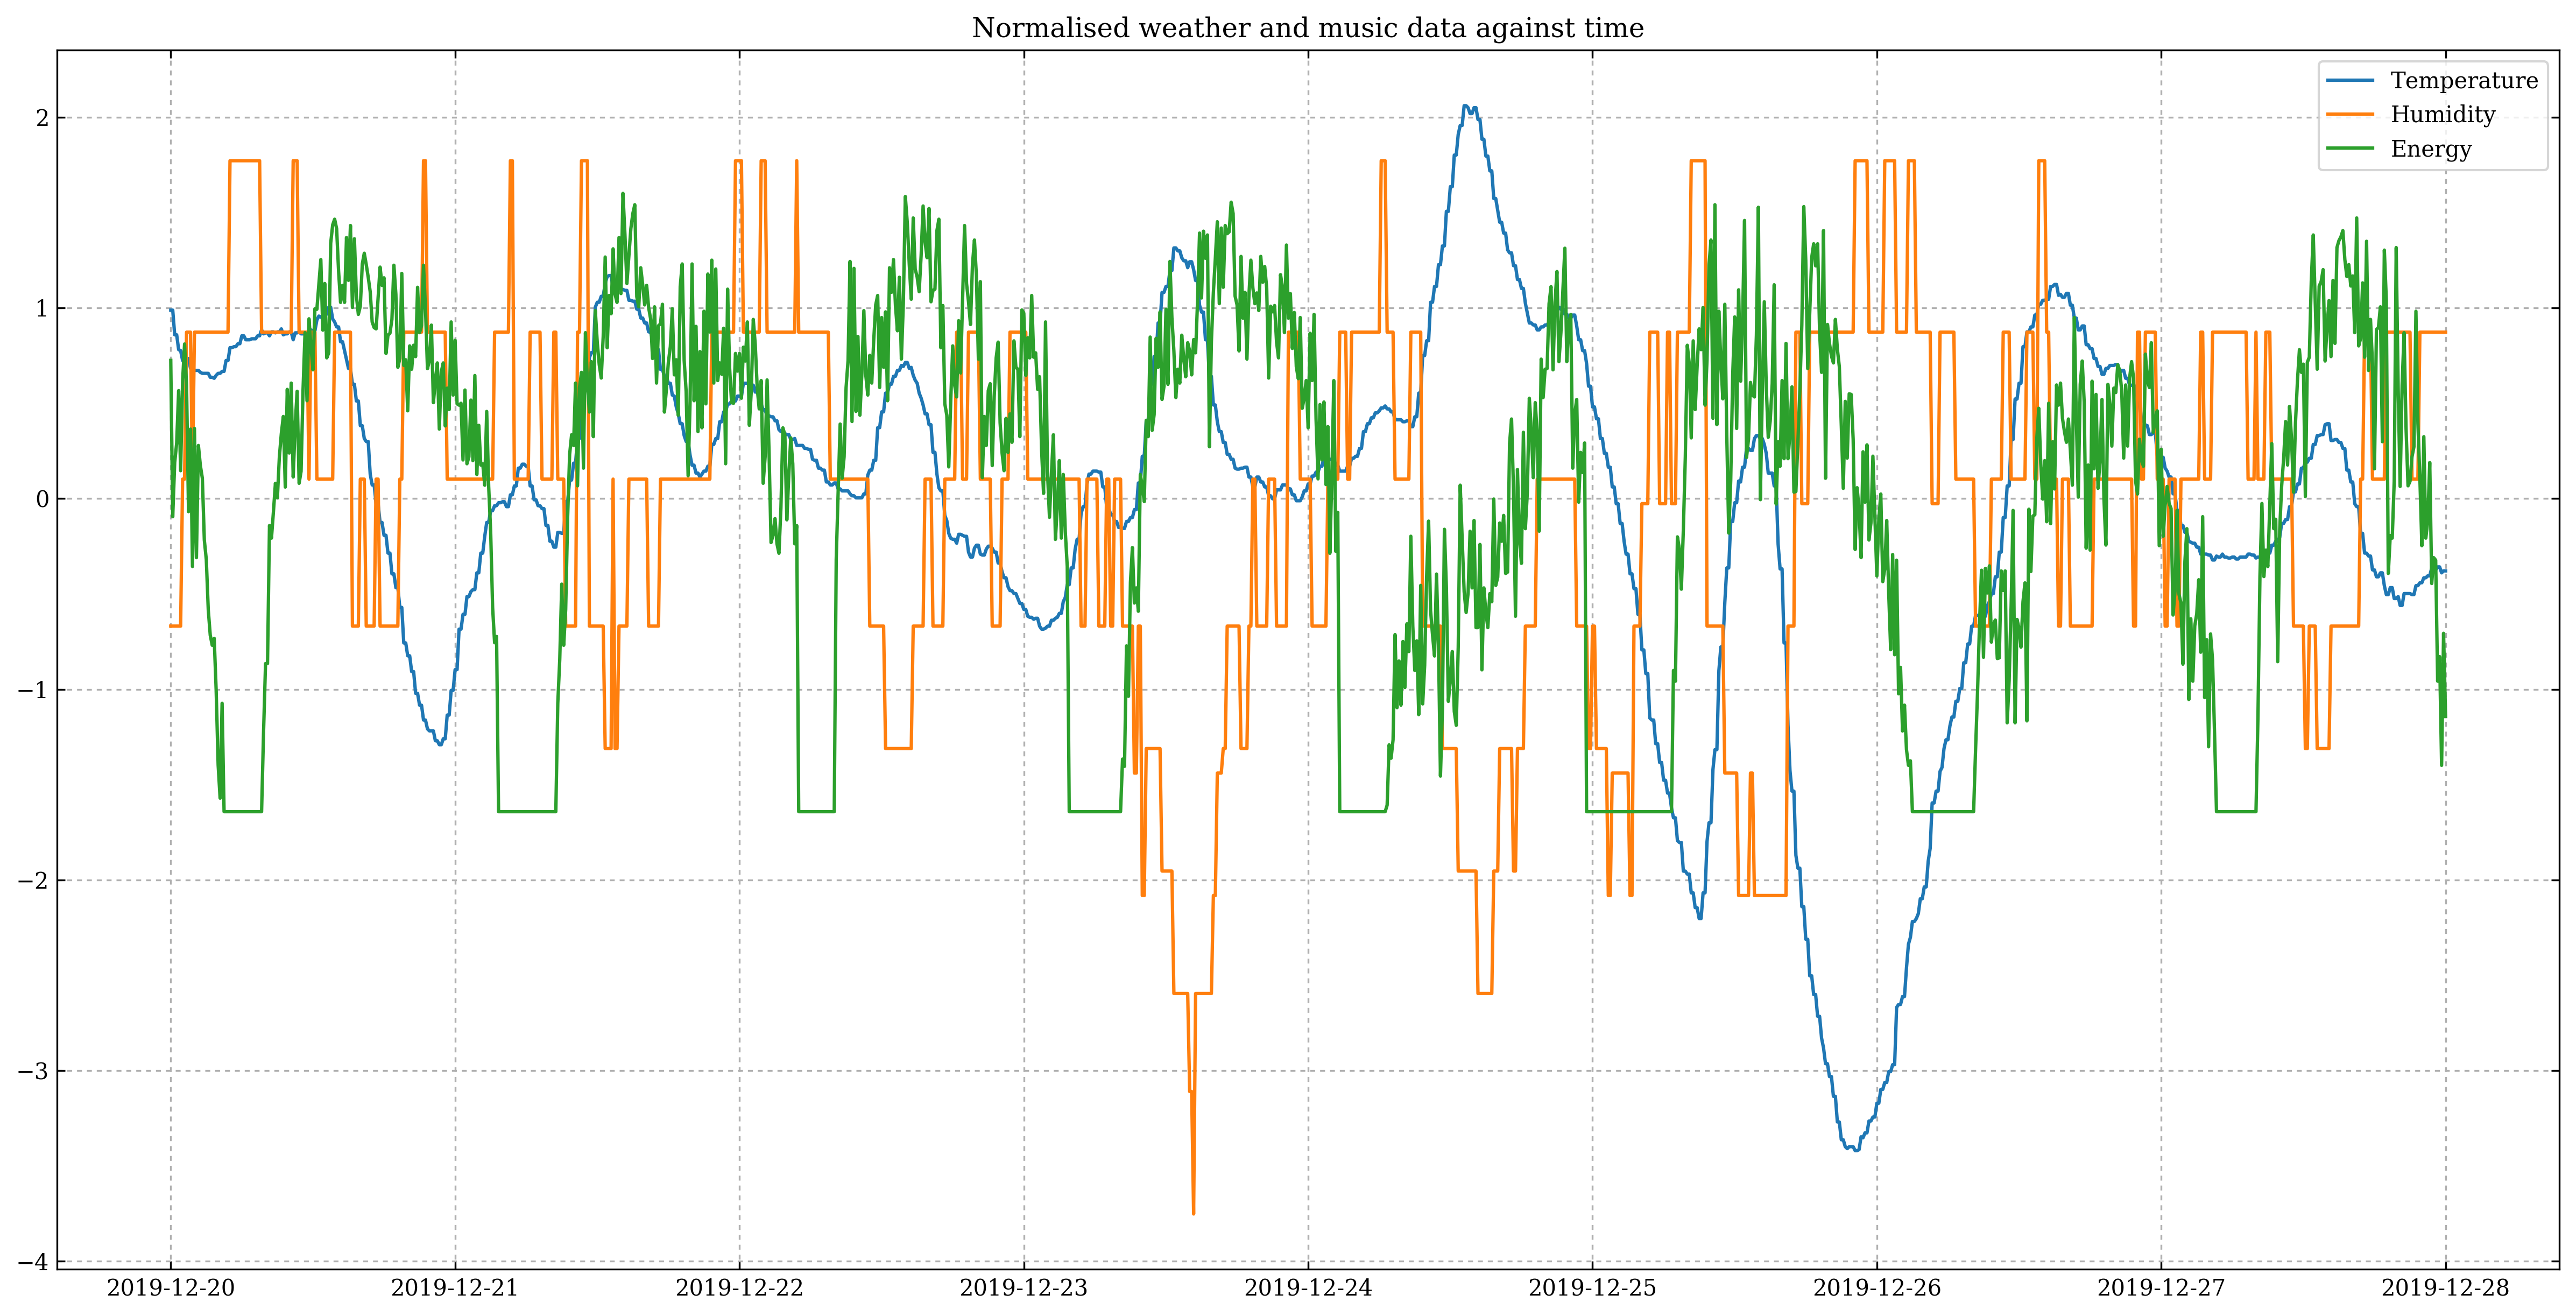

In [8]:
# remove unwanted datasets
cdata2 = pd.concat([weather['Temperature'],weather['Humidity'],music['Energy']], axis=1)
print(cdata2.head())

# create new dataframes to store normalised data
ndata2 = cdata2.copy(deep=True)

stats = {}

for x in ndata2.columns.values:
    mean = np.mean(ndata2[x])
    stdv = np.std(ndata2[x])
    stats[x] = {"mean":mean,"stdv":stdv}
    ndata2[x] = (ndata2[x] - mean) / stdv
    
fig, axs = newfigure()

for x in ndata2.columns.values: 
    axs.plot(ndata2[x])

axs.set_title("Normalised weather and music data against time")
axs.legend()
plt.show()

#ndata2.to_csv('alldata.csv')

## Autocorrelation

Calculating the correlation of time series observations with previous time steps (lags).

### Weather Autocorrelation

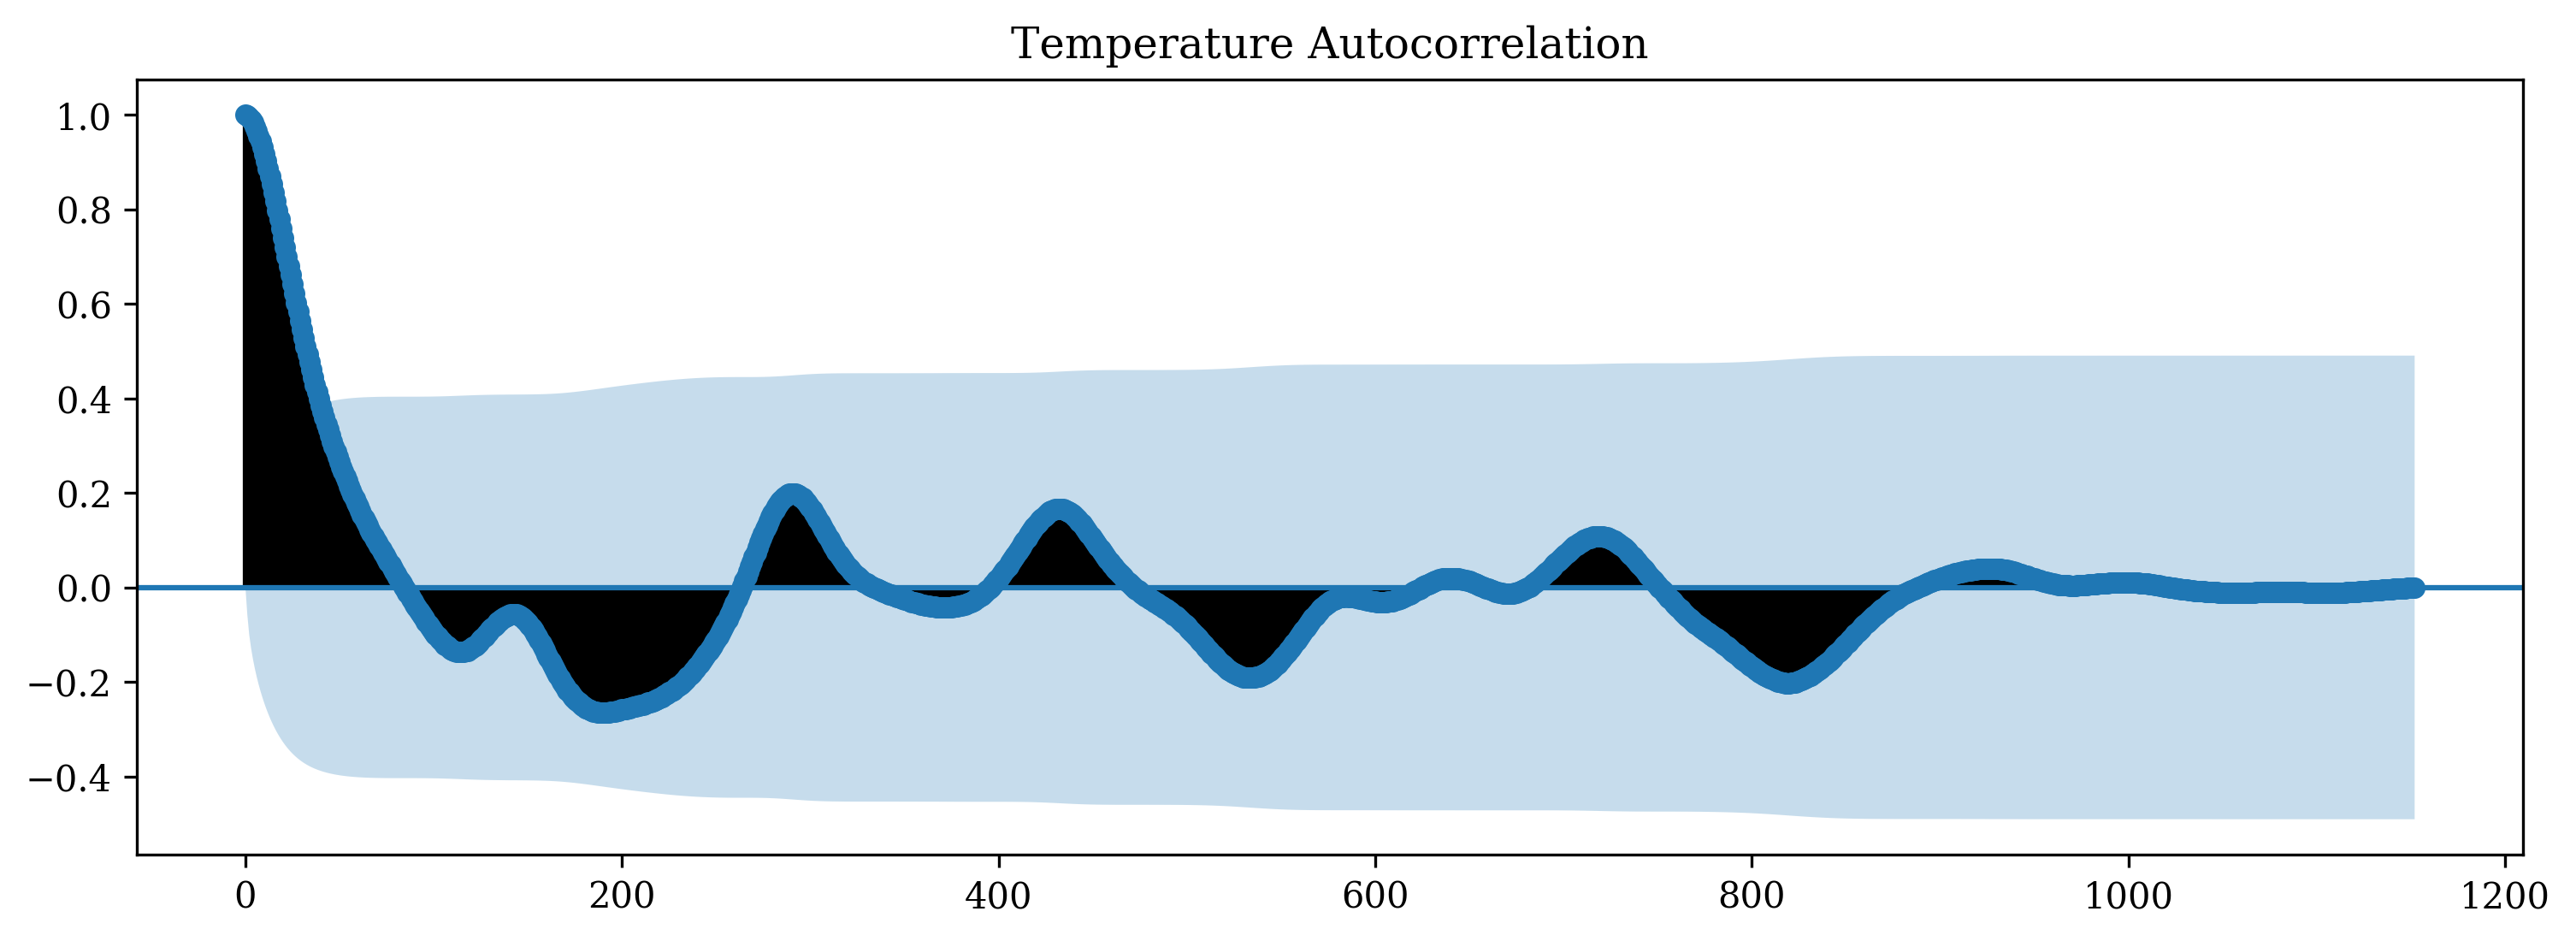

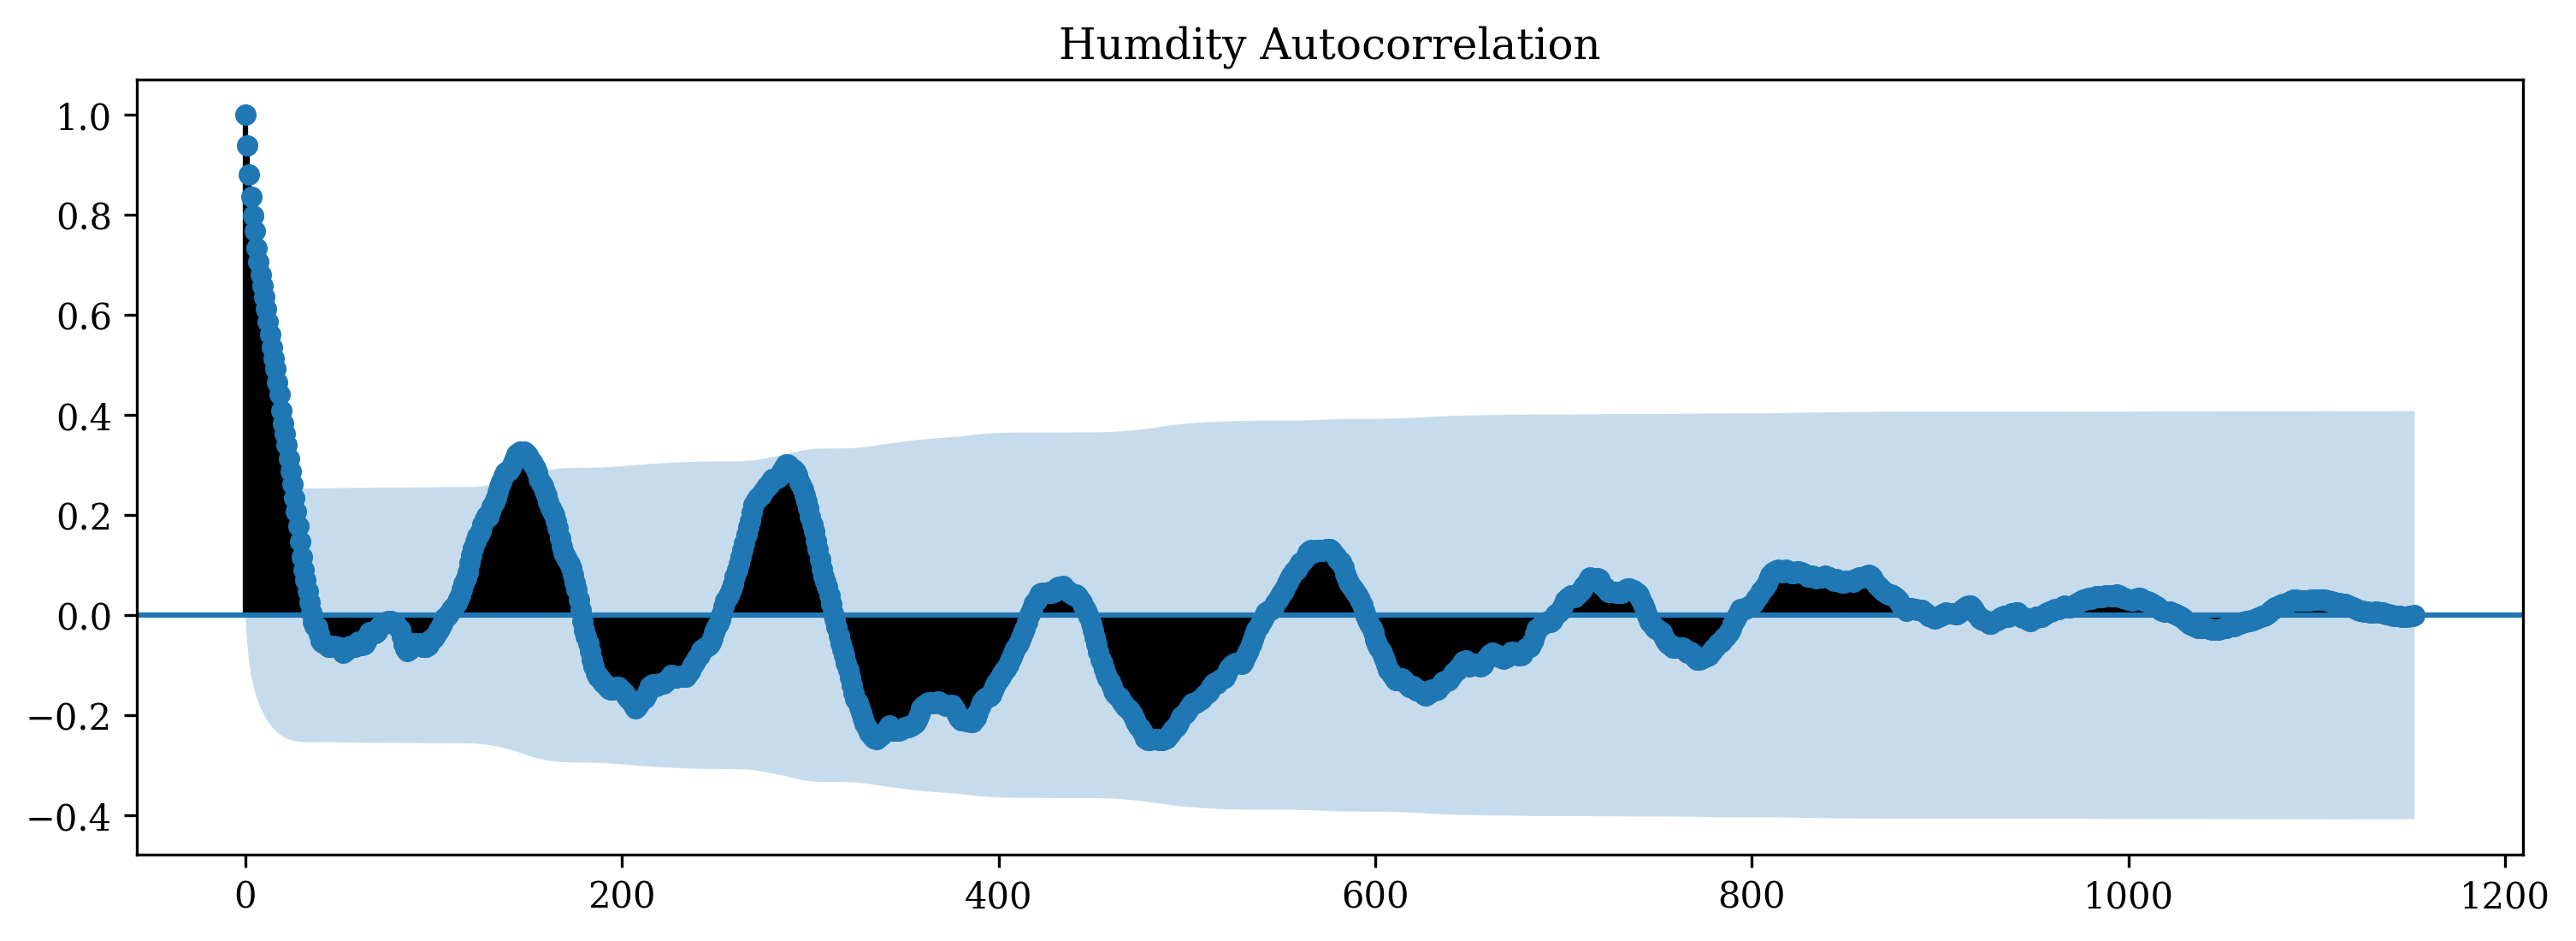

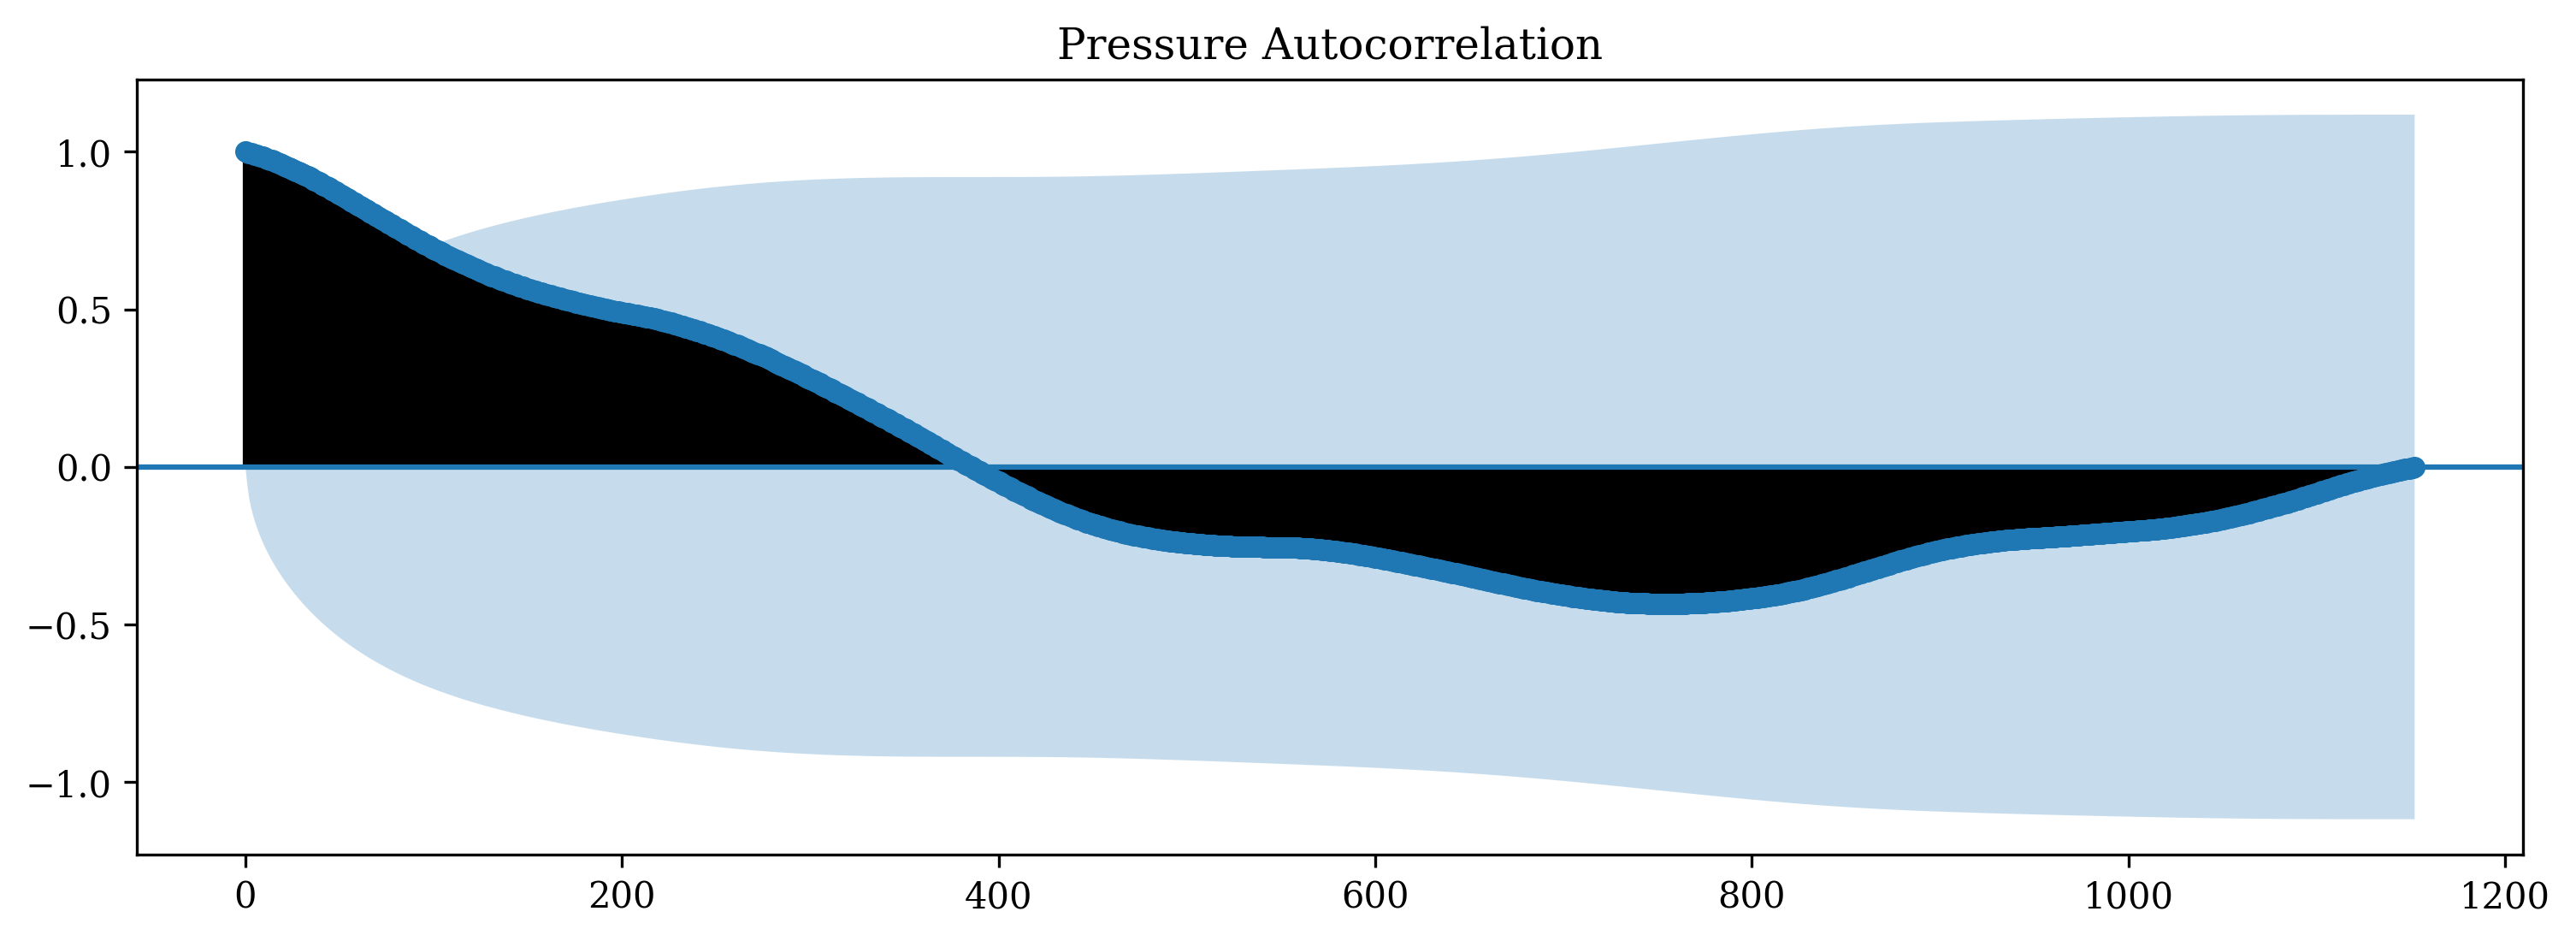

In [9]:
from statsmodels.graphics.tsaplots import plot_acf

acf = plot_acf(weather["Temperature"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Temperature Autocorrelation")
plt.show()

acf = plot_acf(weather["Humidity"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Humdity Autocorrelation")
plt.show()

acf = plot_acf(weather["Pressure"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Pressure Autocorrelation")
plt.show()

### Music Features Autocorrelation

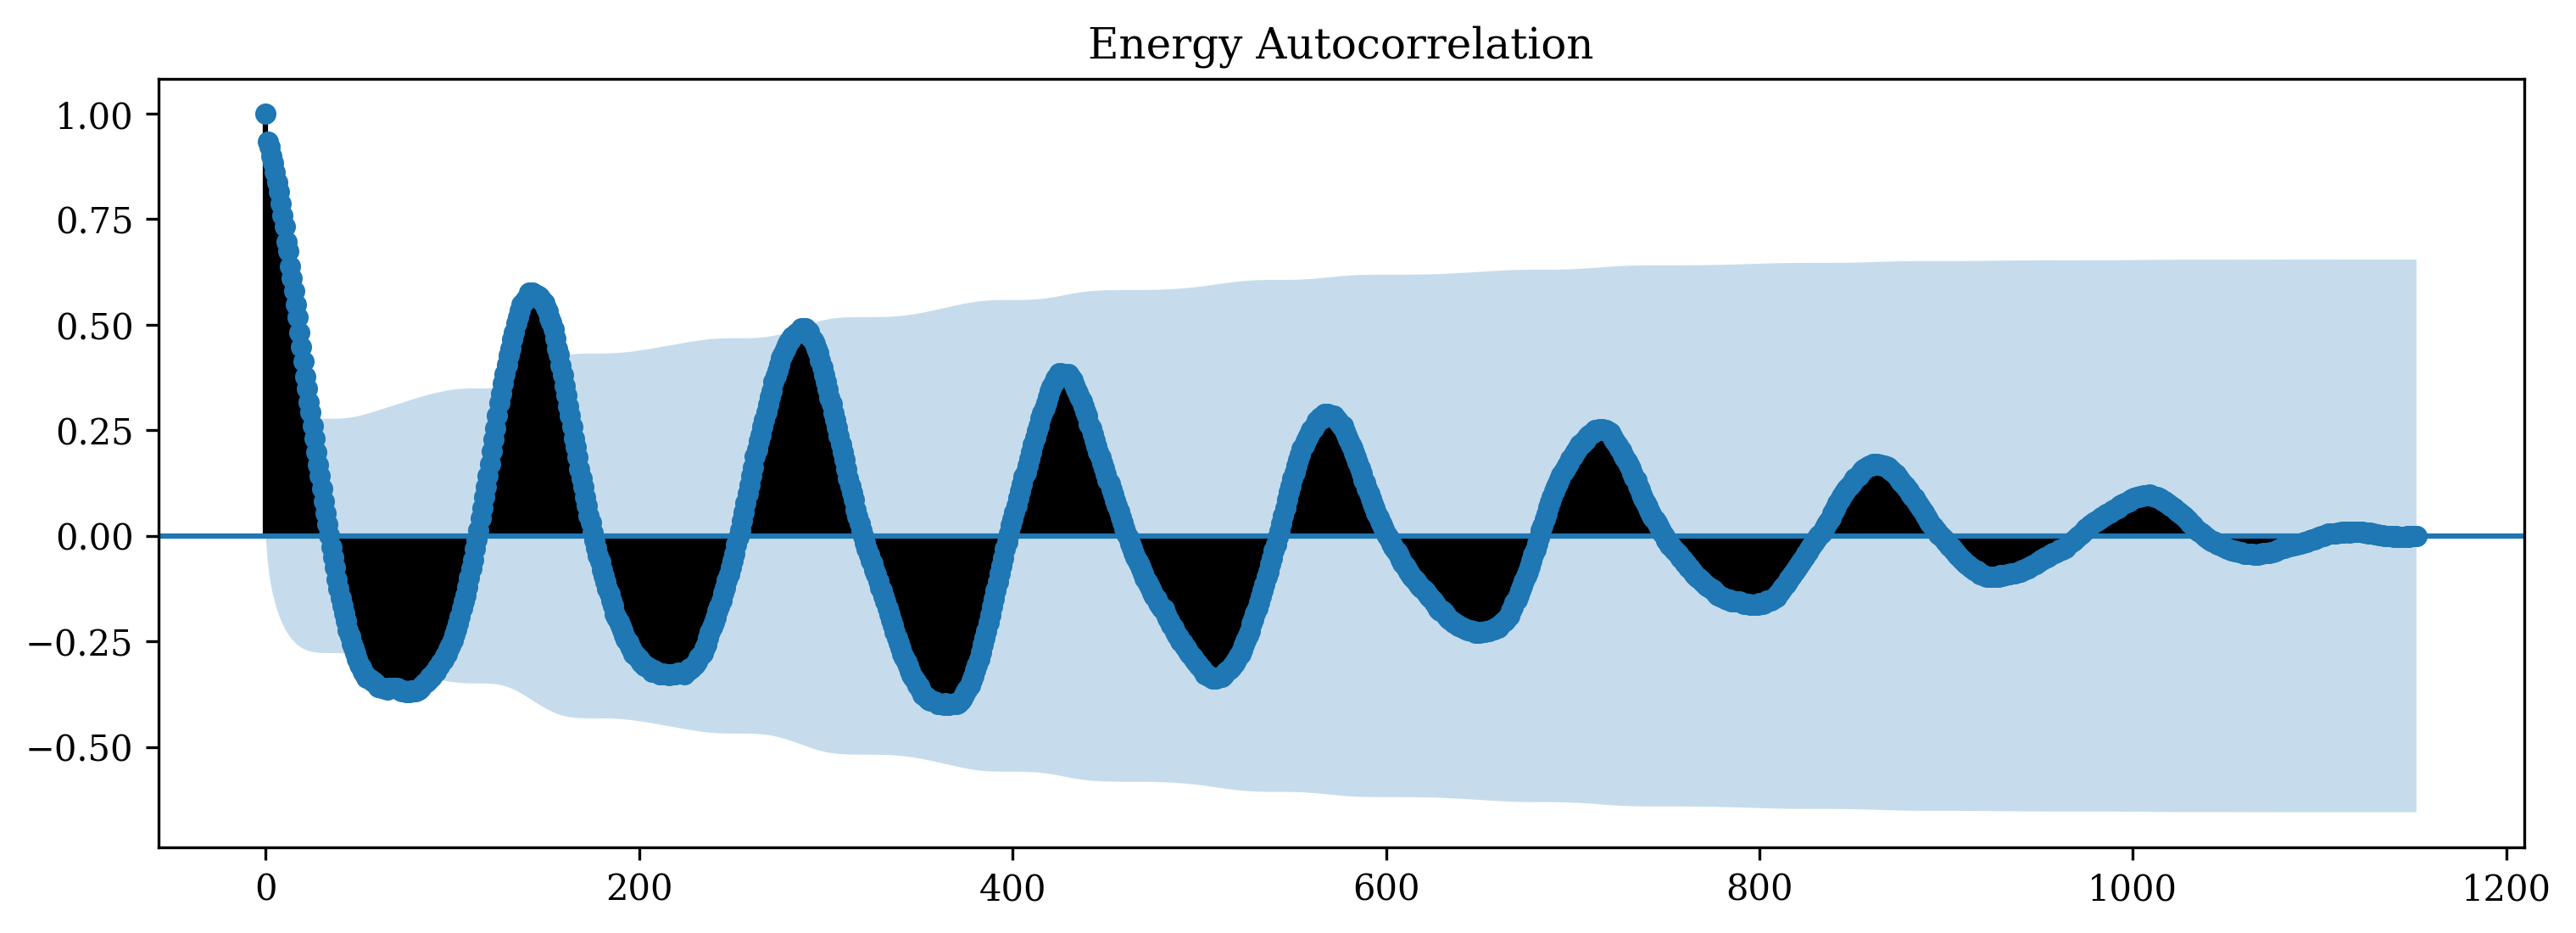

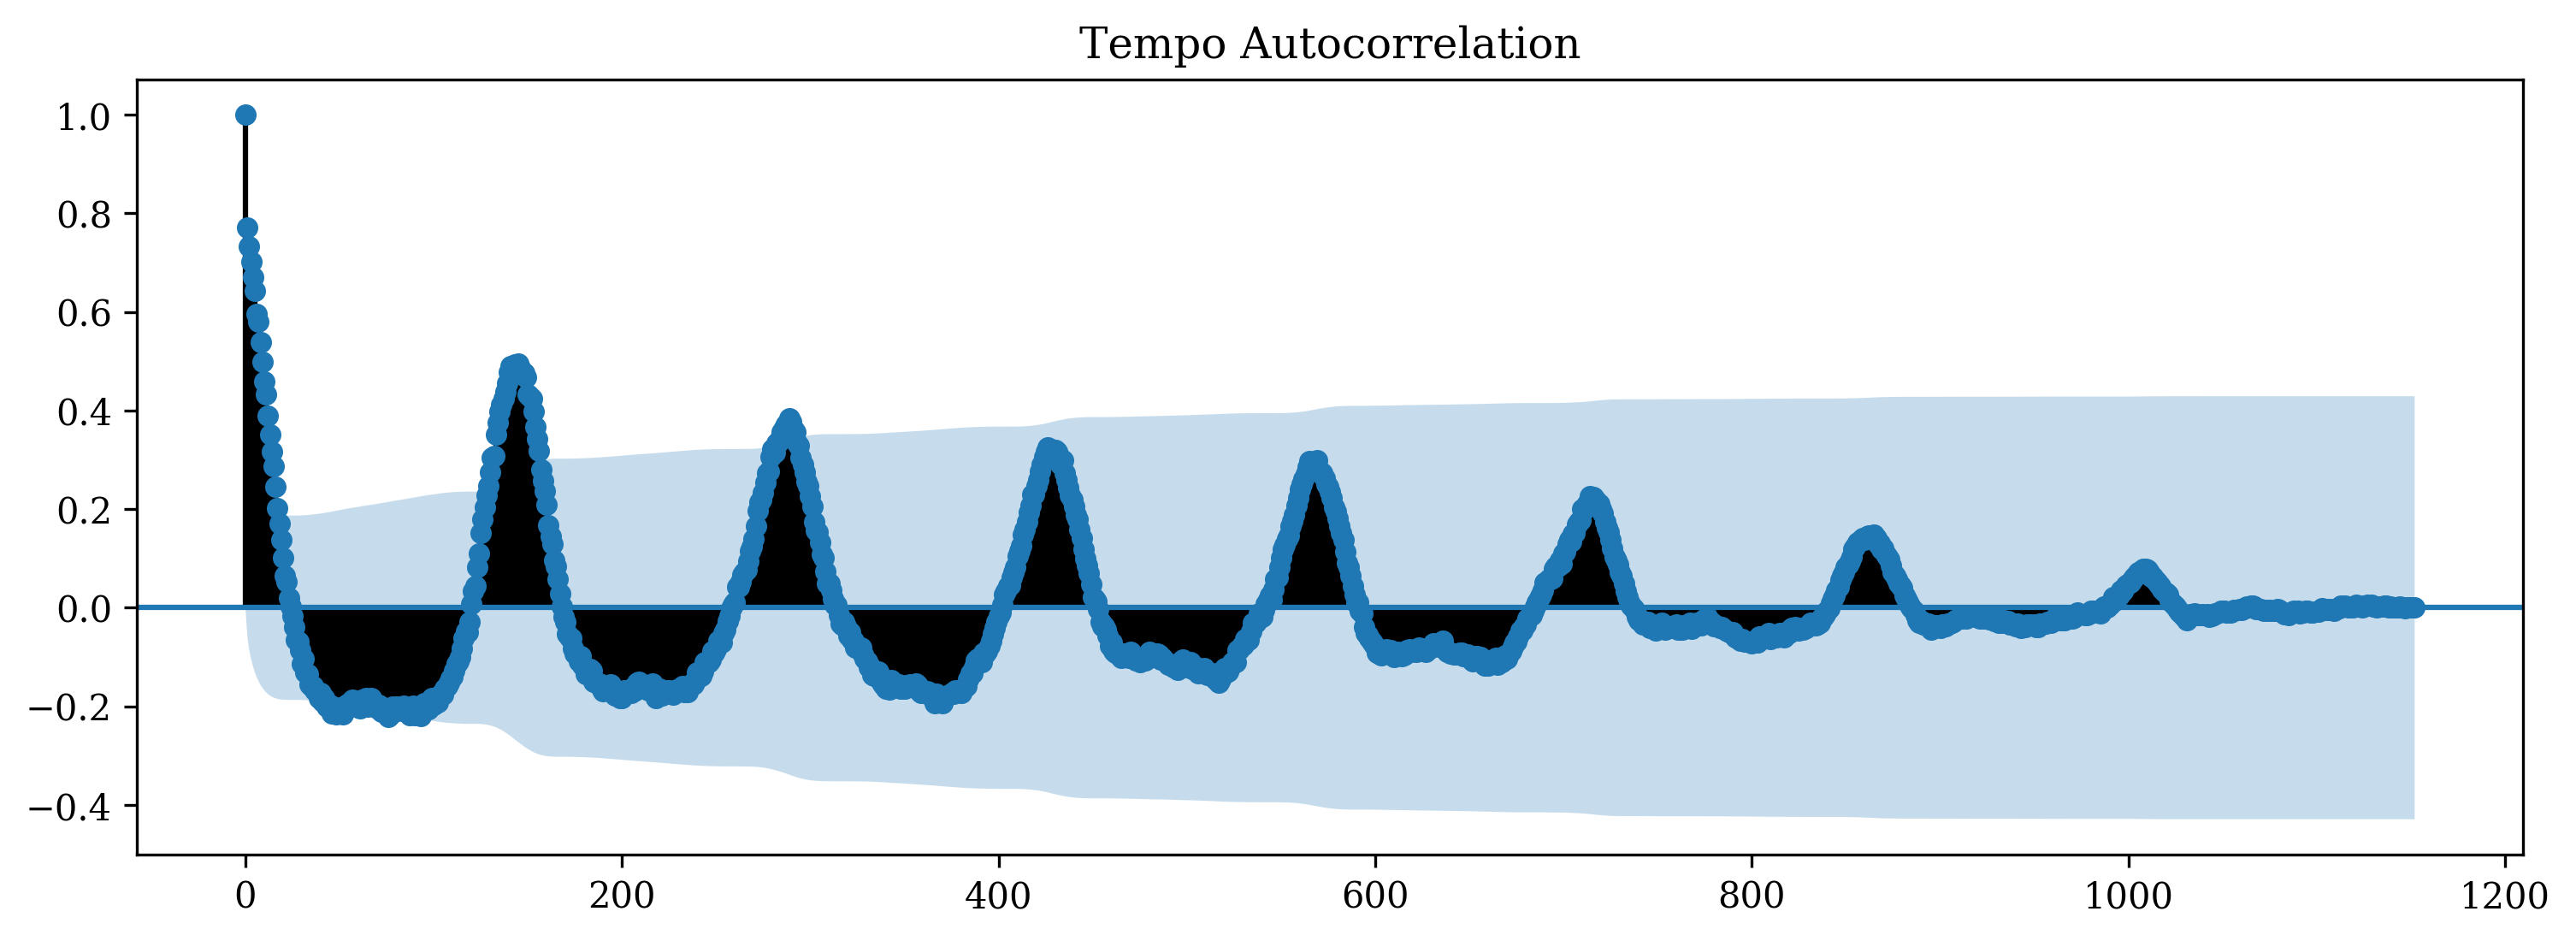

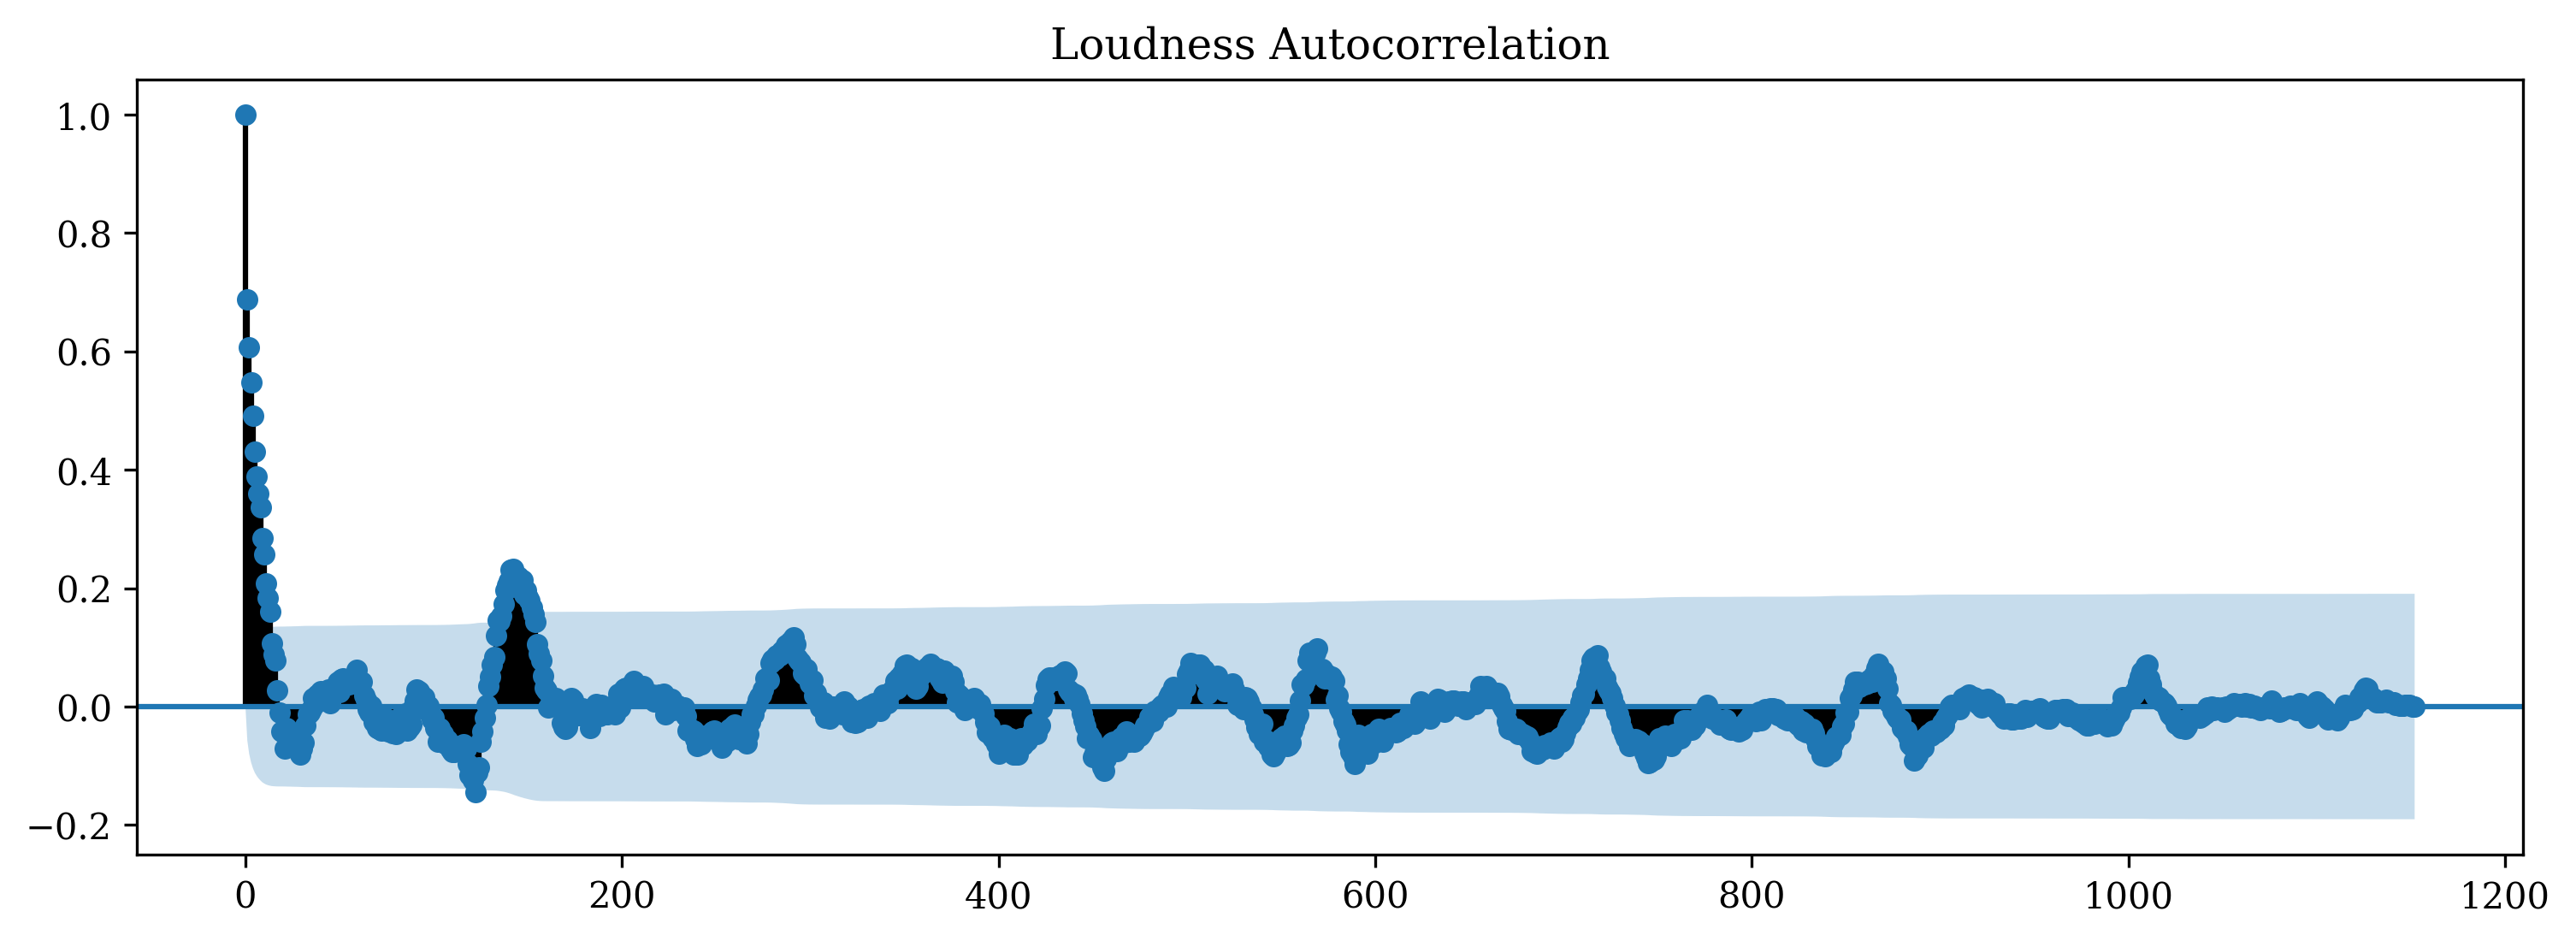

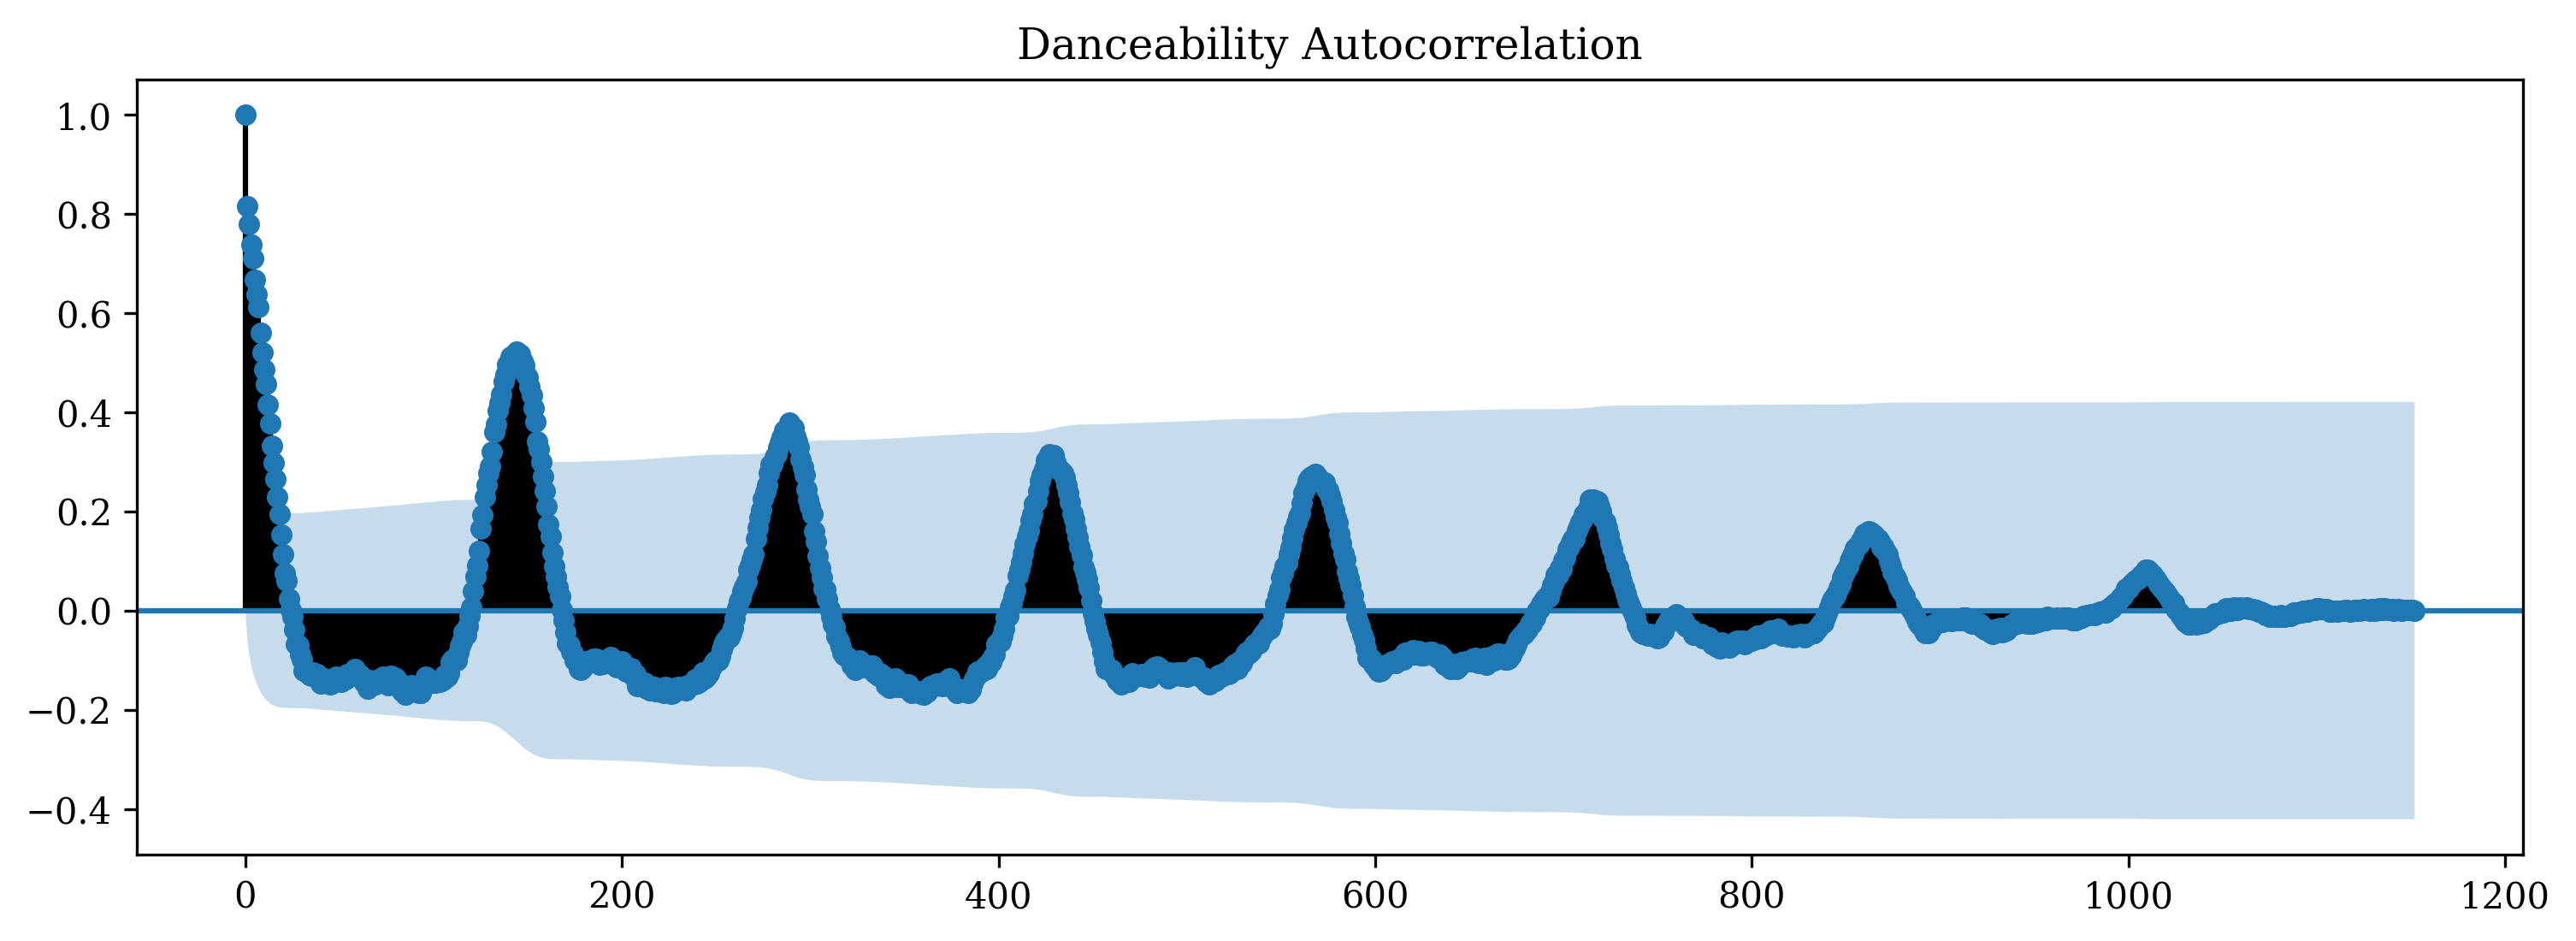

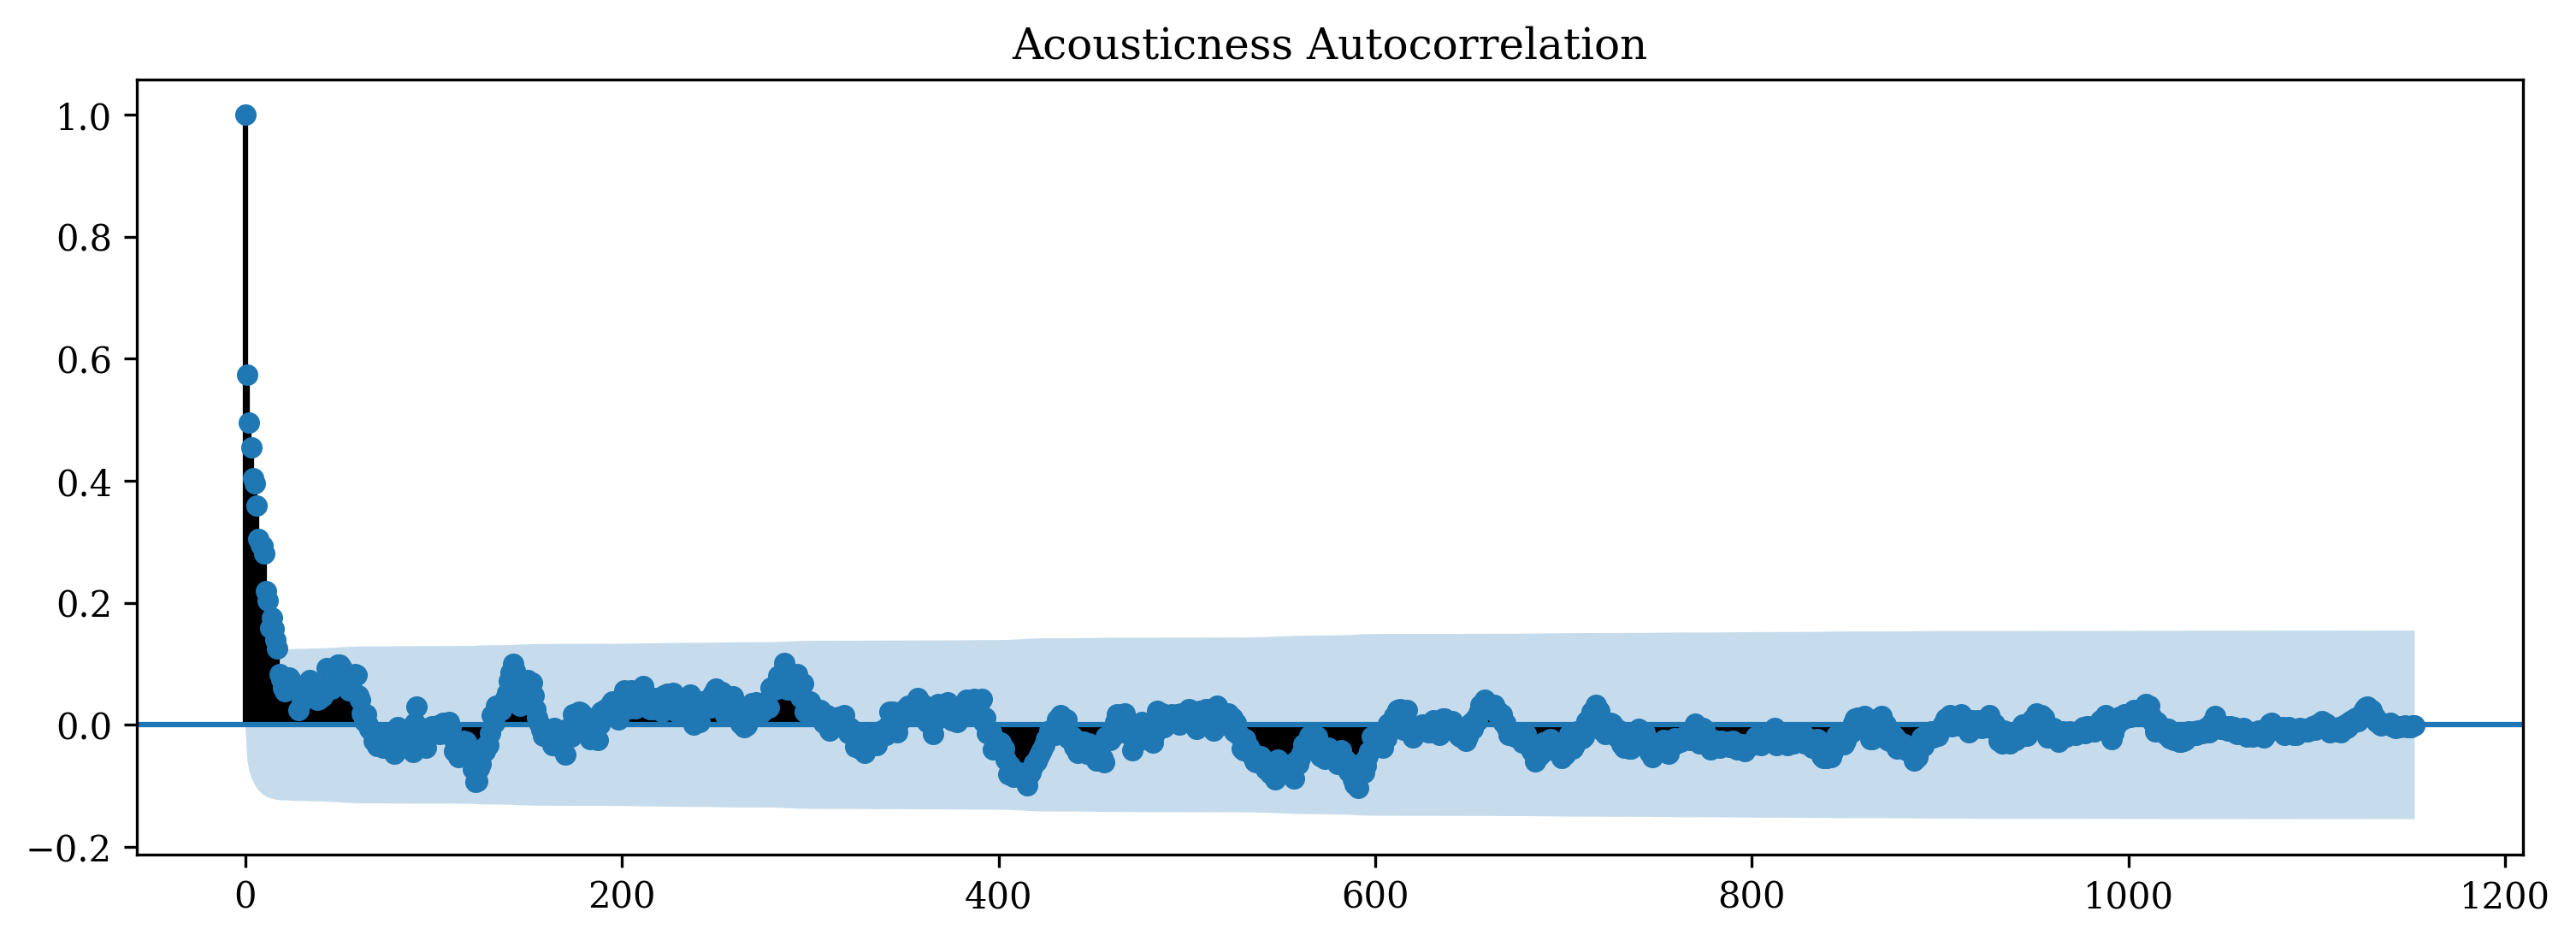

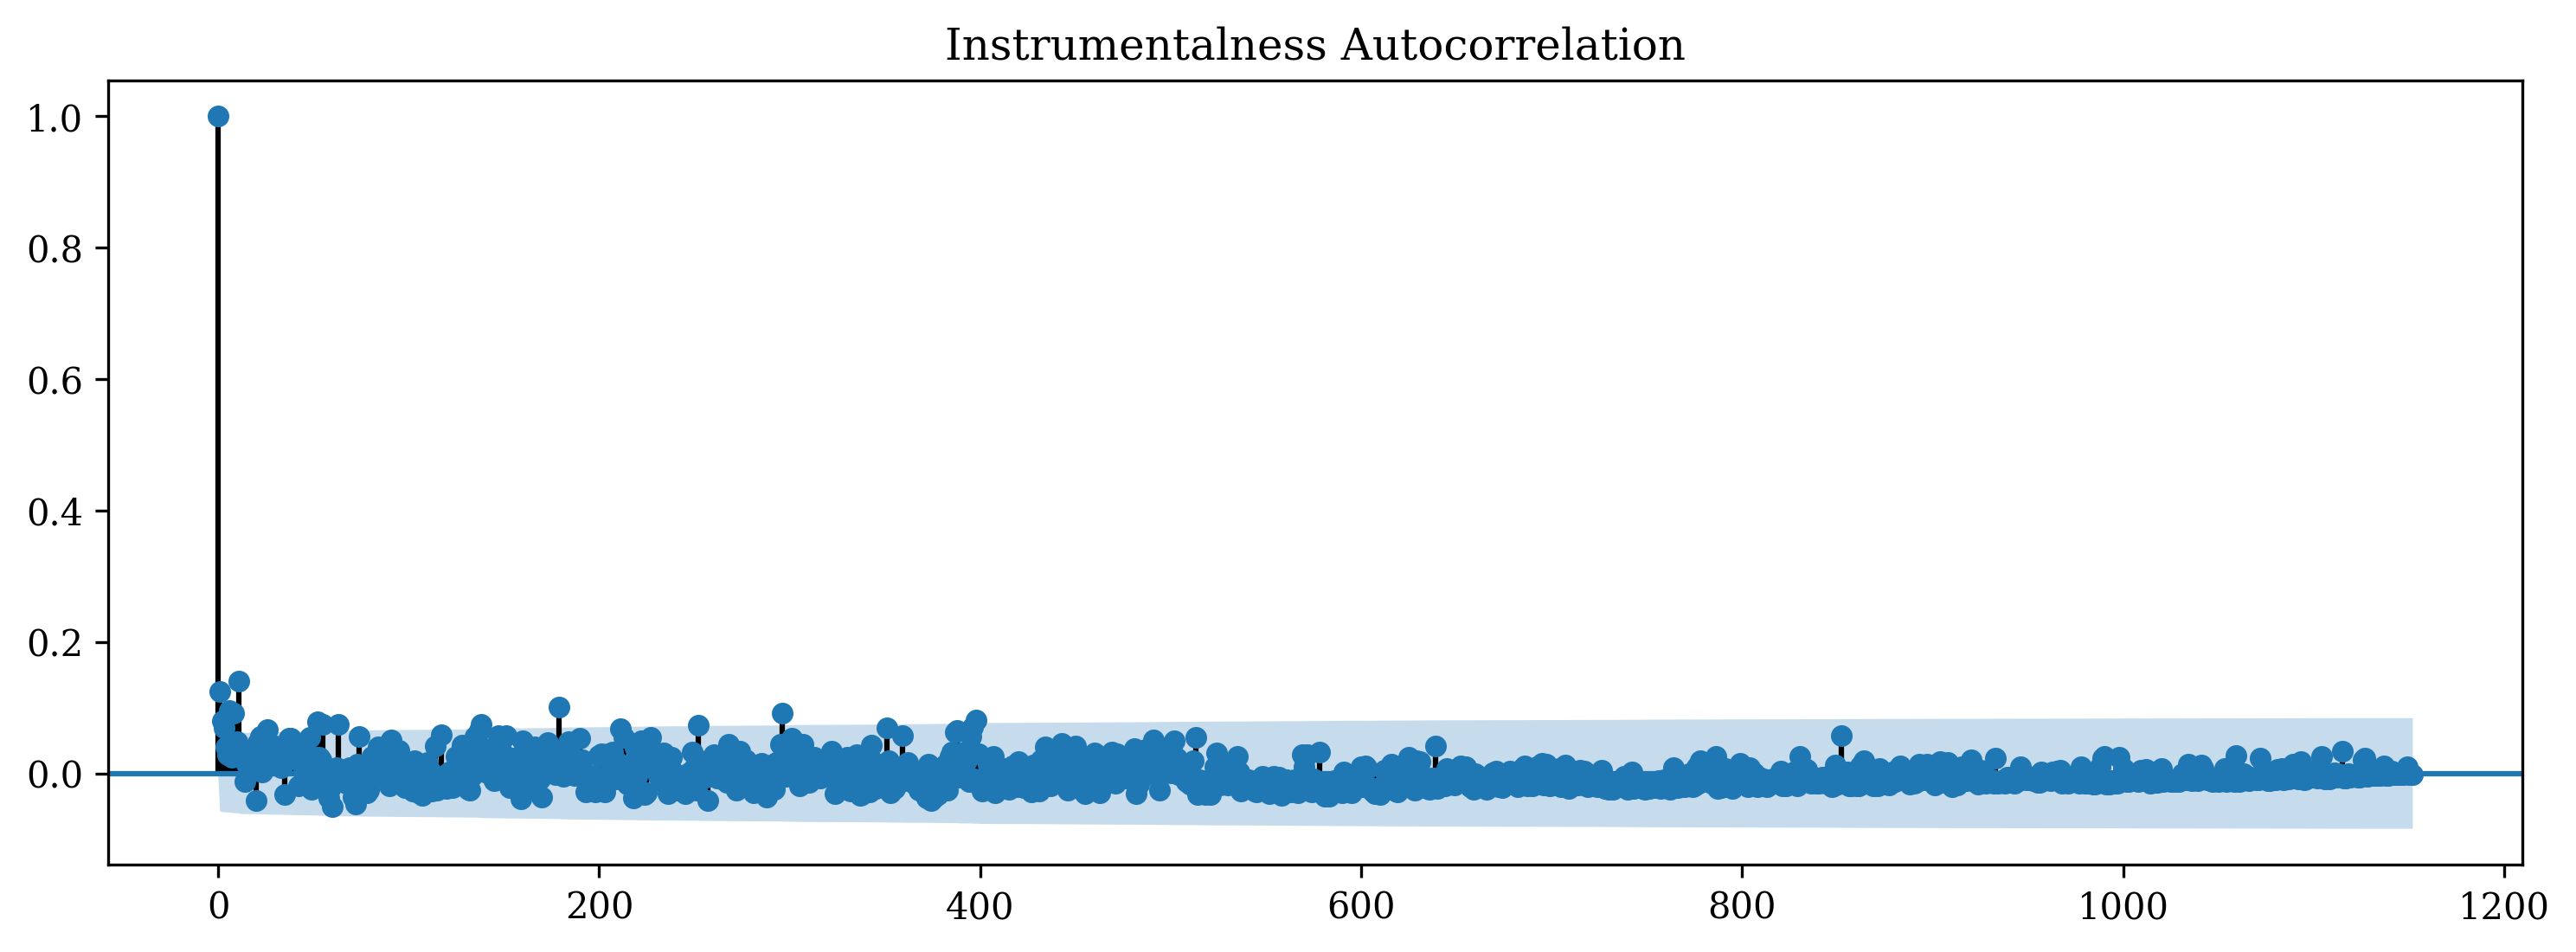

In [10]:
acf = plot_acf(music["Energy"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Energy Autocorrelation")
plt.show()

acf = plot_acf(music["Tempo"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Tempo Autocorrelation")
plt.show()

acf = plot_acf(music["Loudness"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Loudness Autocorrelation")
plt.show()

acf = plot_acf(music["Danceability"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Danceability Autocorrelation")
plt.show()

acf = plot_acf(music["Acousticness"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Acousticness Autocorrelation")
plt.show()

acf = plot_acf(music["Instrumentalness"])
acf.set_figheight(4)
acf.set_figwidth(12)
plt.title("Instrumentalness Autocorrelation")
plt.show()

### Partial Autocorrelation

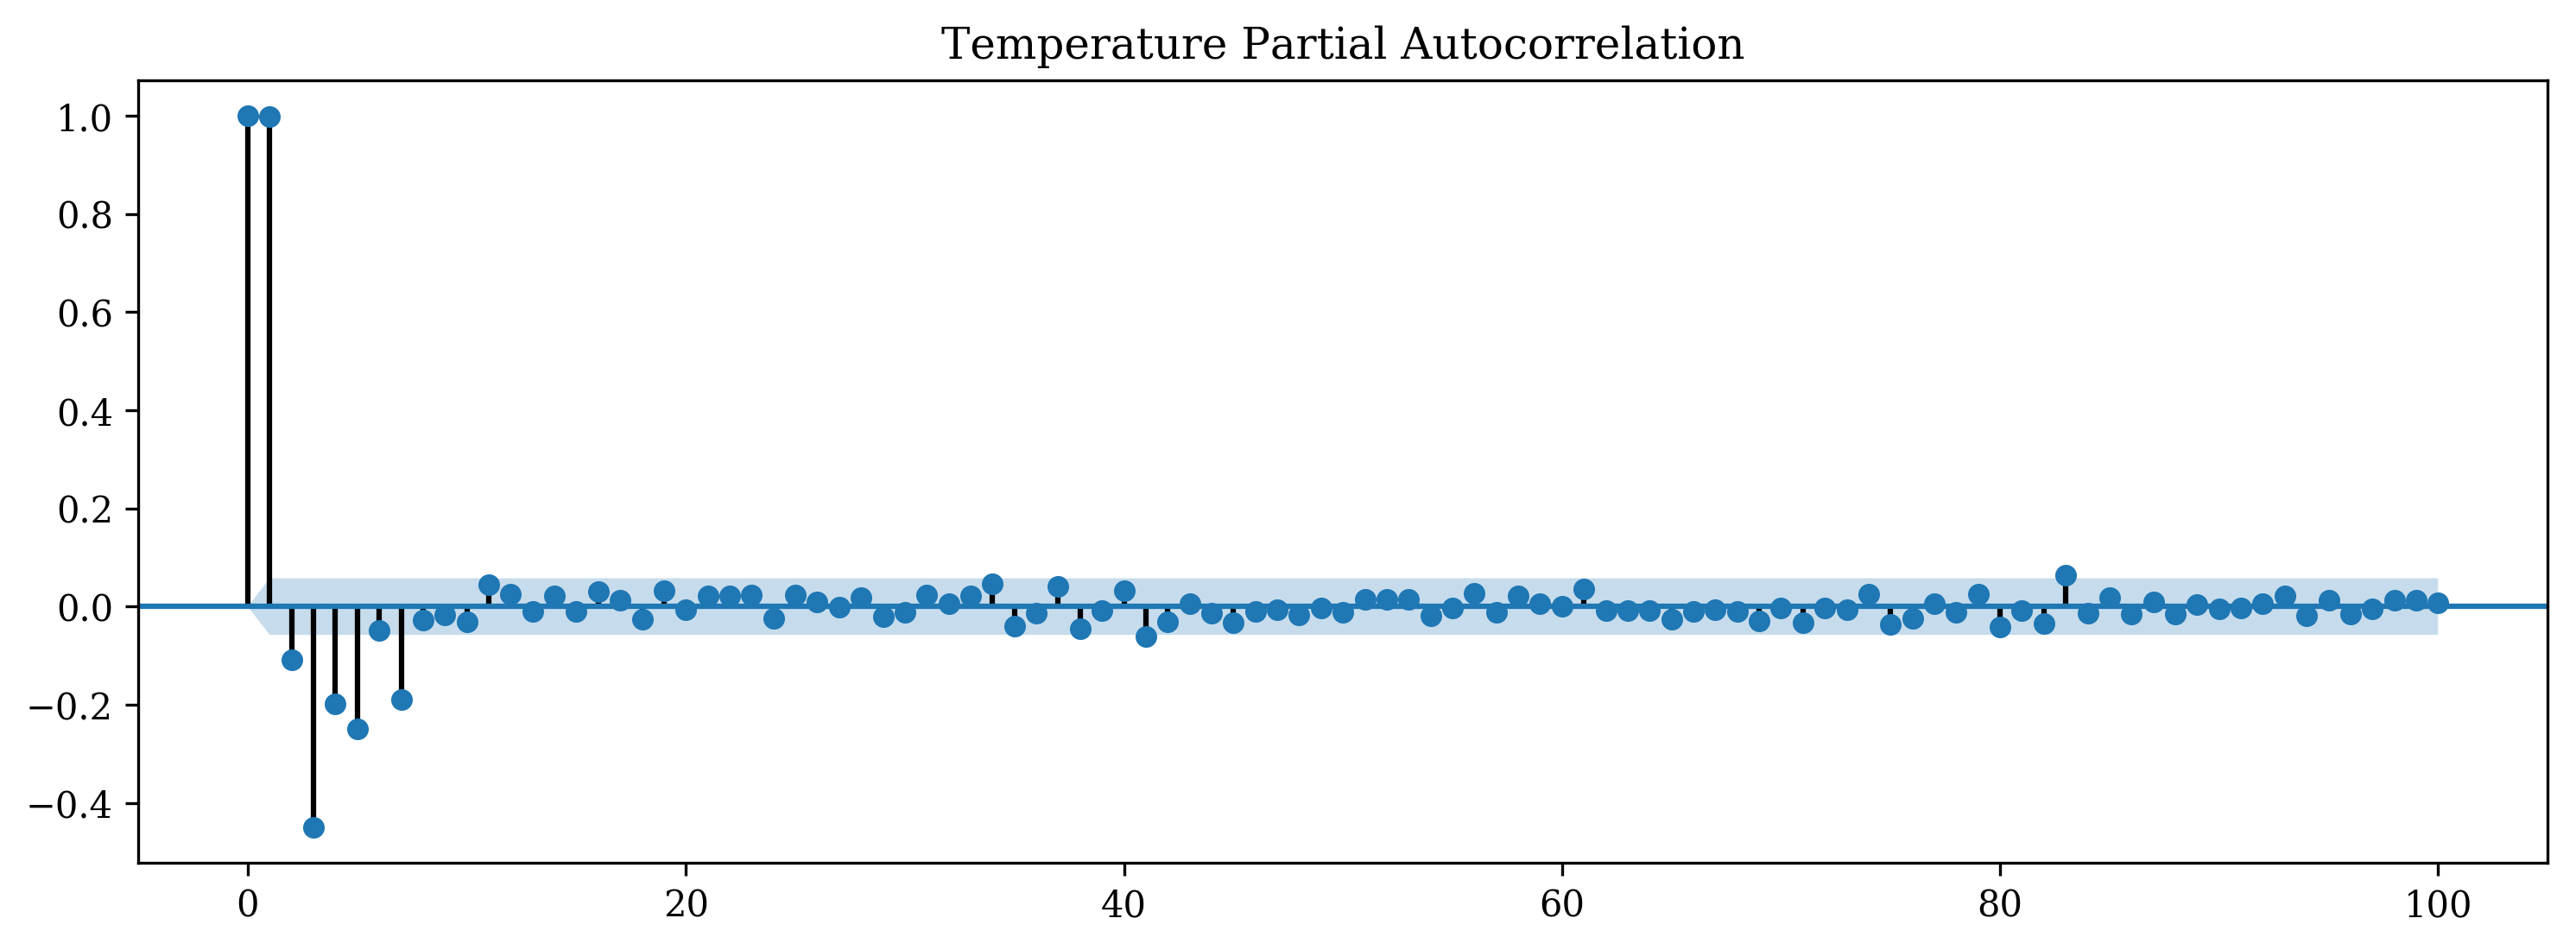

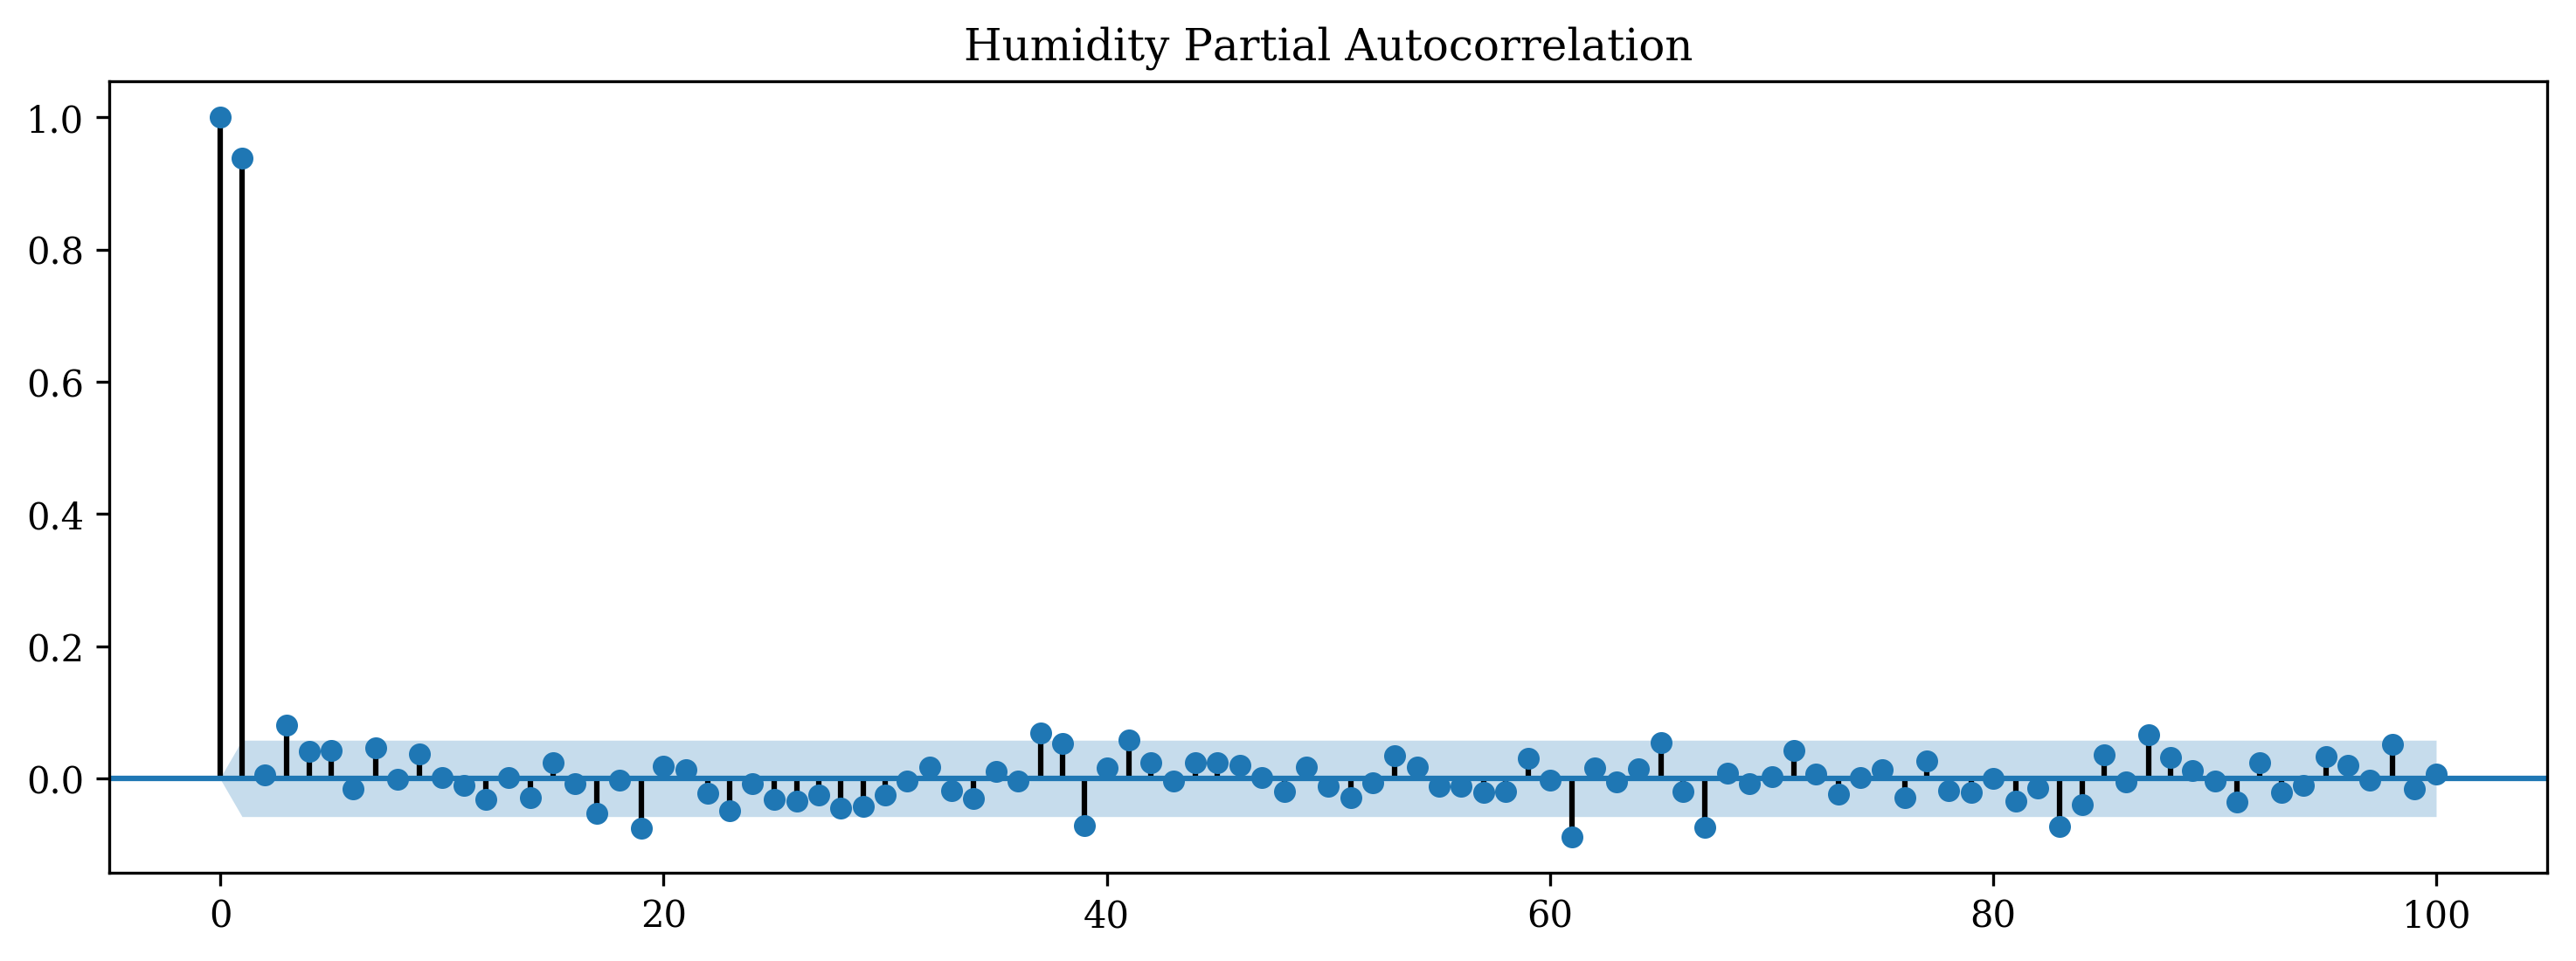

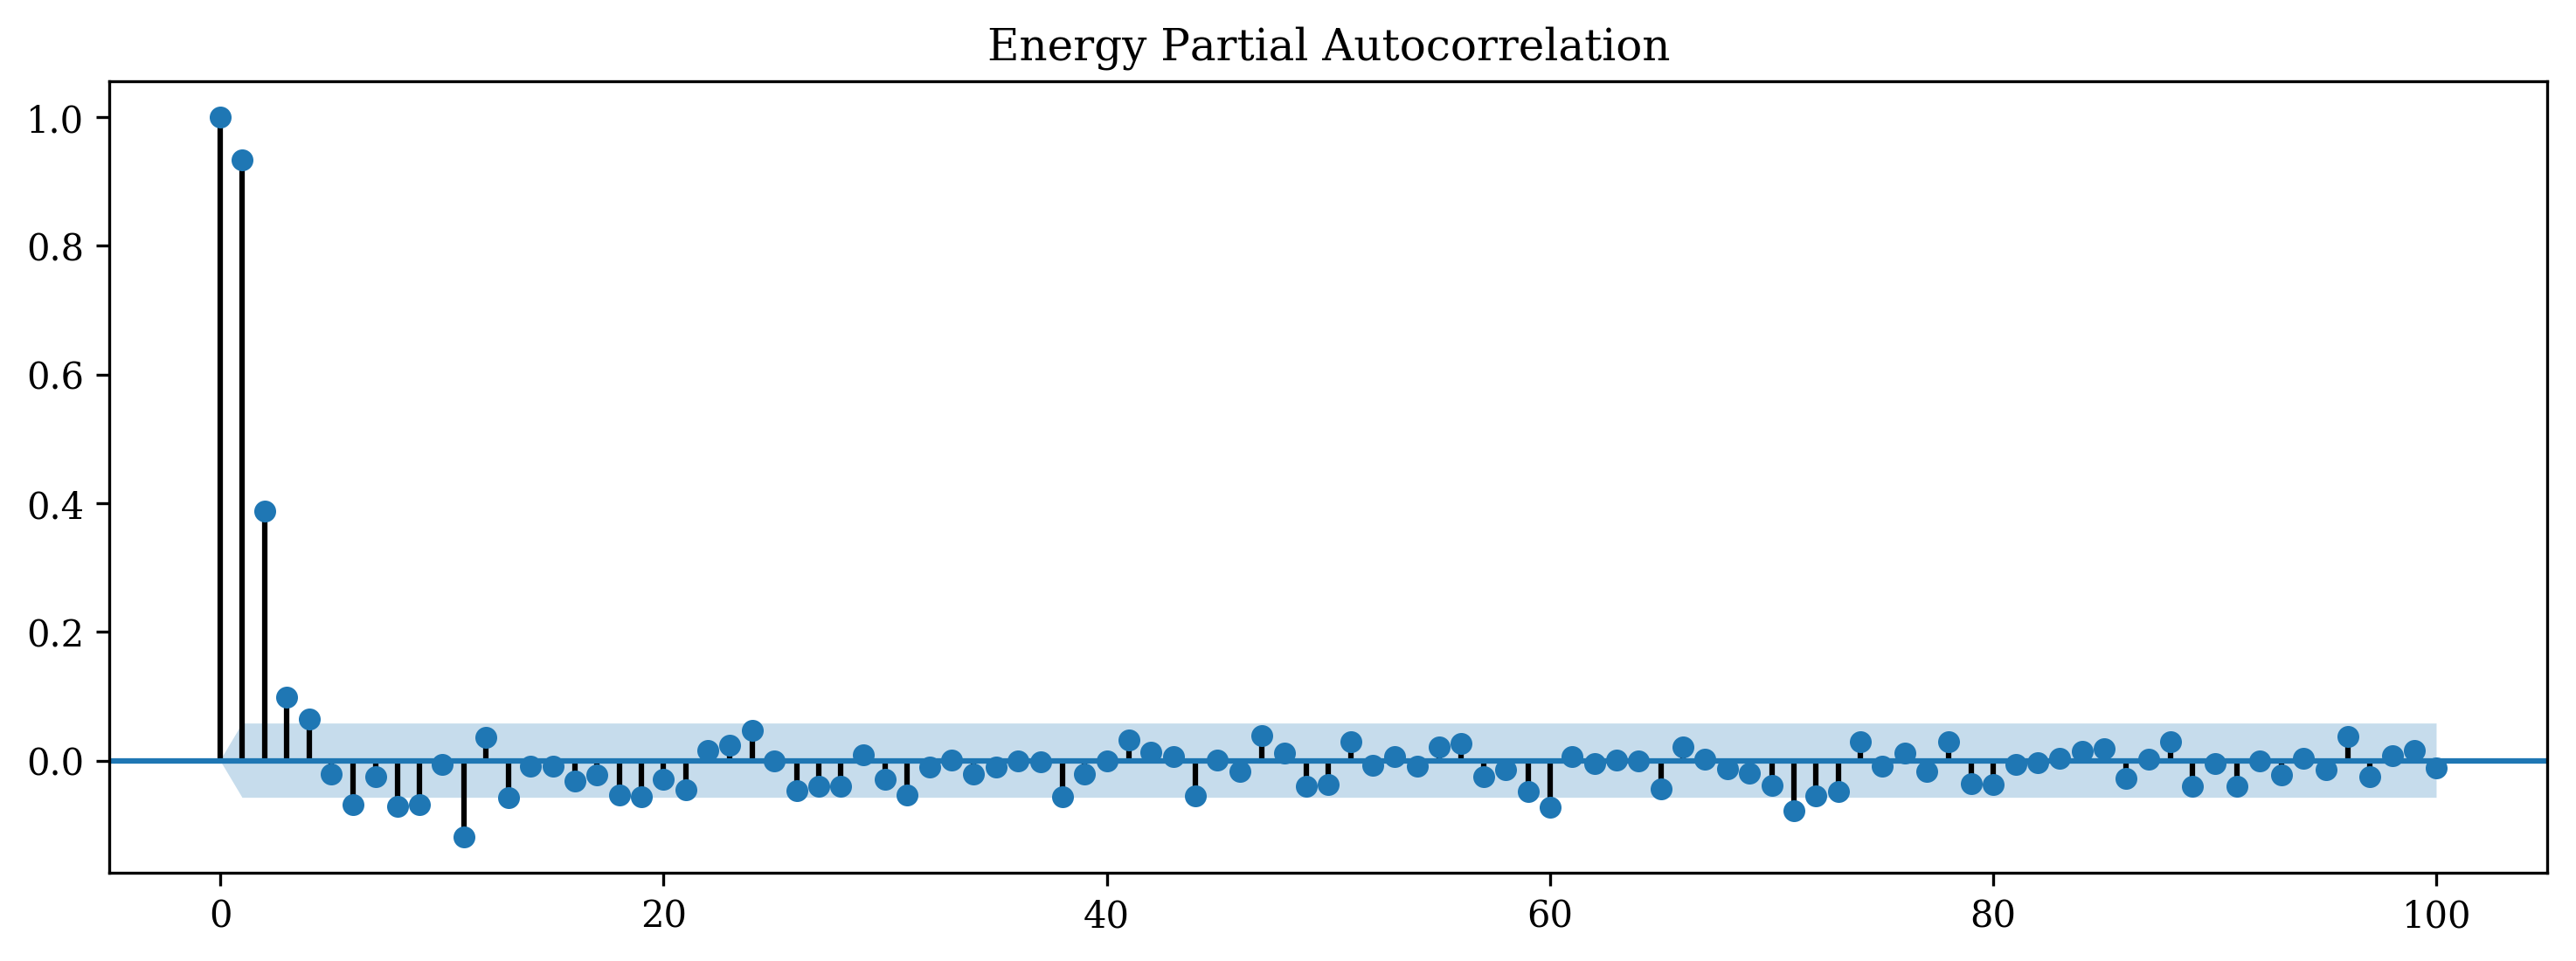

In [23]:
from statsmodels.graphics.tsaplots import plot_pacf

pacf = plot_pacf(weather["Temperature"],lags=100)
pacf.set_figheight(4)
pacf.set_figwidth(12)
plt.title("Temperature Partial Autocorrelation")
plt.show()

pacf = plot_pacf(weather["Humidity"],lags=100)
pacf.set_figheight(4)
pacf.set_figwidth(12)
plt.title("Humidity Partial Autocorrelation")
plt.show()

pacf = plot_pacf(music["Energy"],lags=100)
pacf.set_figheight(4)
pacf.set_figwidth(12)
plt.title("Energy Partial Autocorrelation")
plt.show()

## FFT: Fast Fourier Transform

An FFT is a trade-off between time information and frequency information. By taking an FFT of a time signal, all time information is lost in return for frequency information. To keep information about time and frequencies in one spectrum, we must make a spectrogram. These are DFT's taken on discrete time windows.

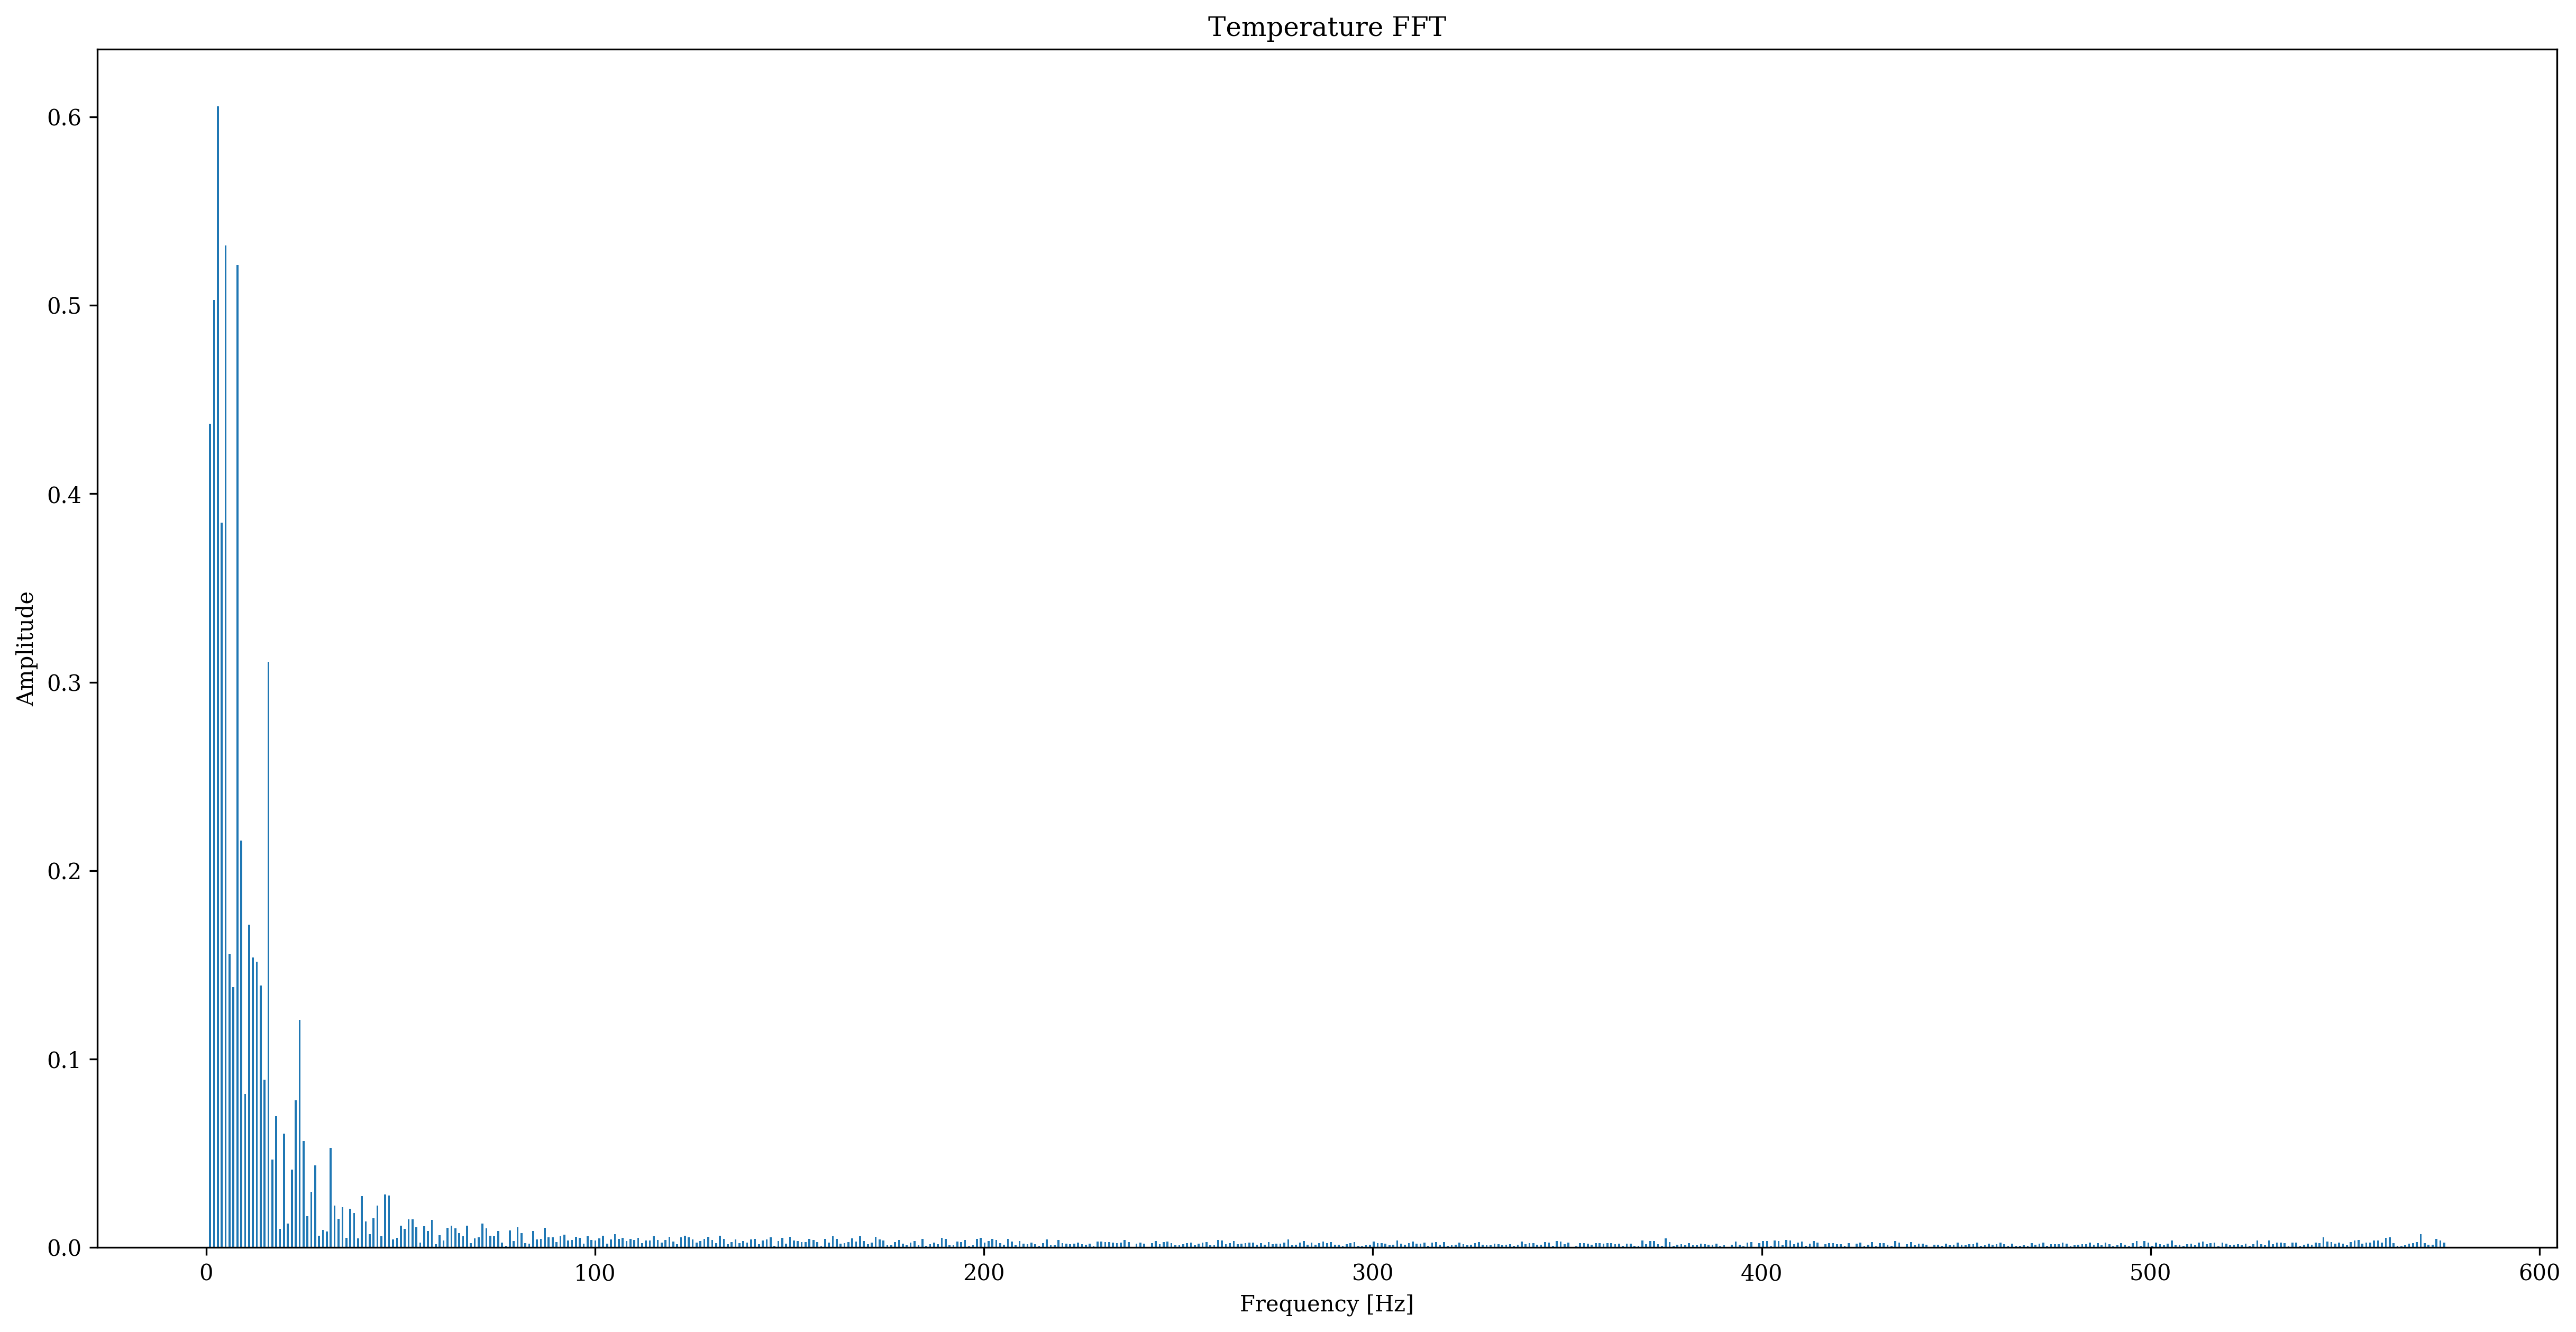

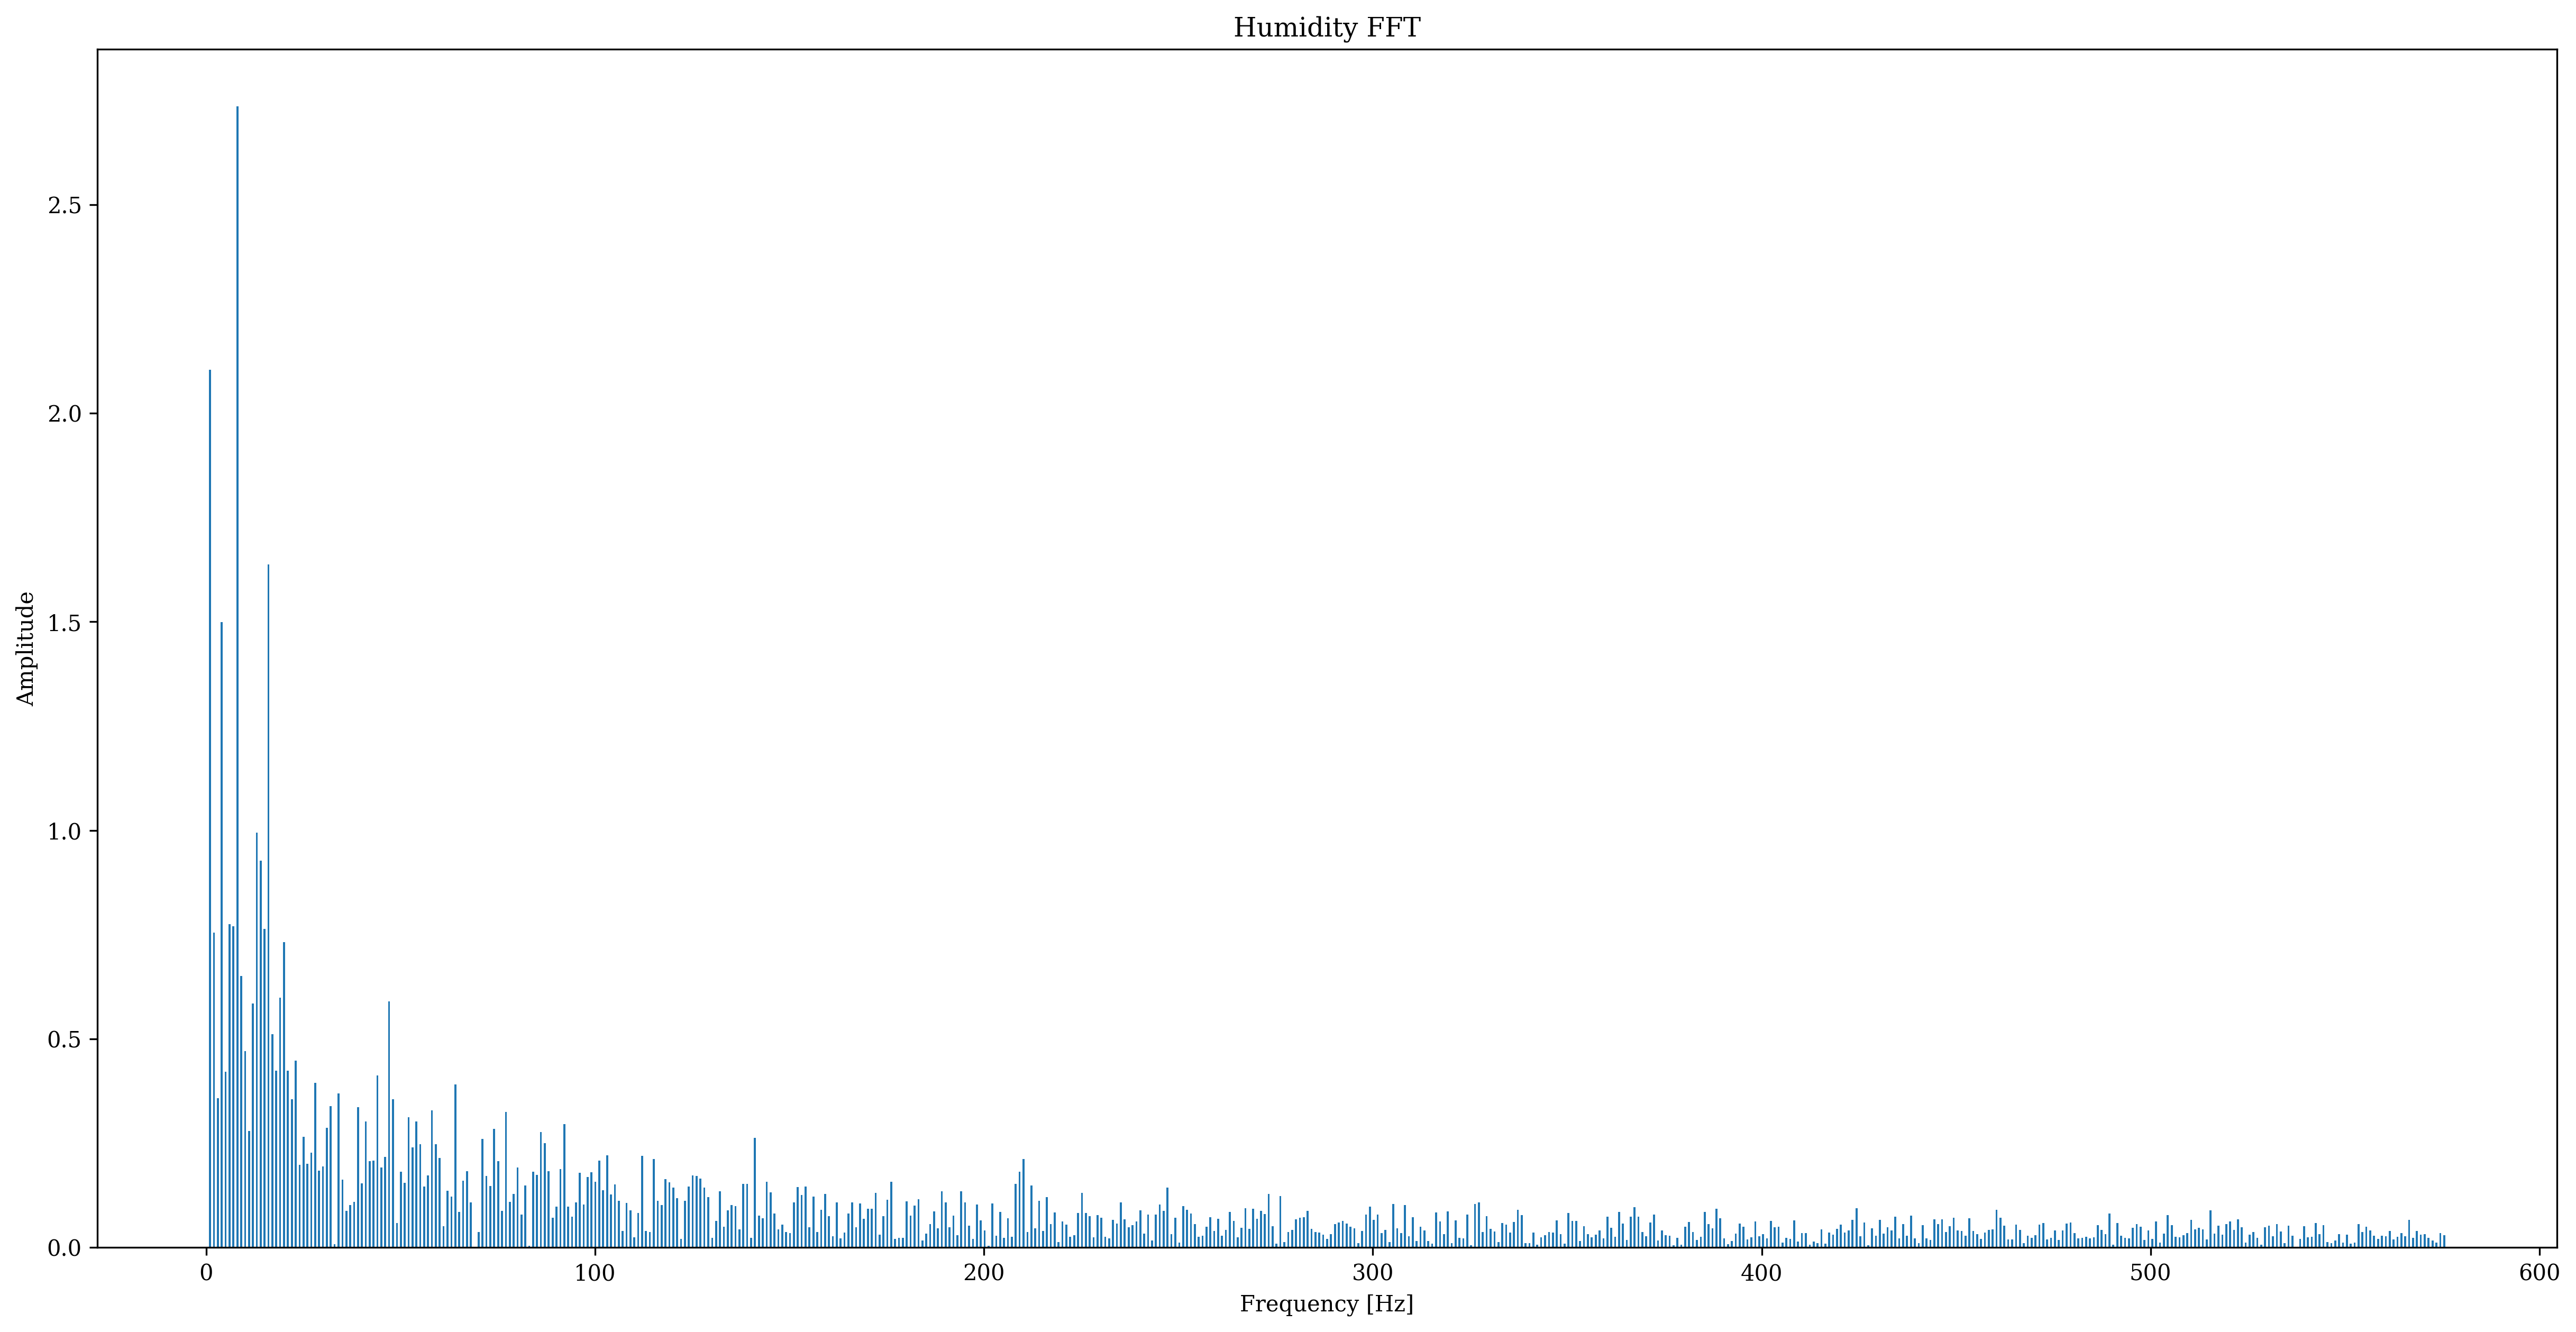

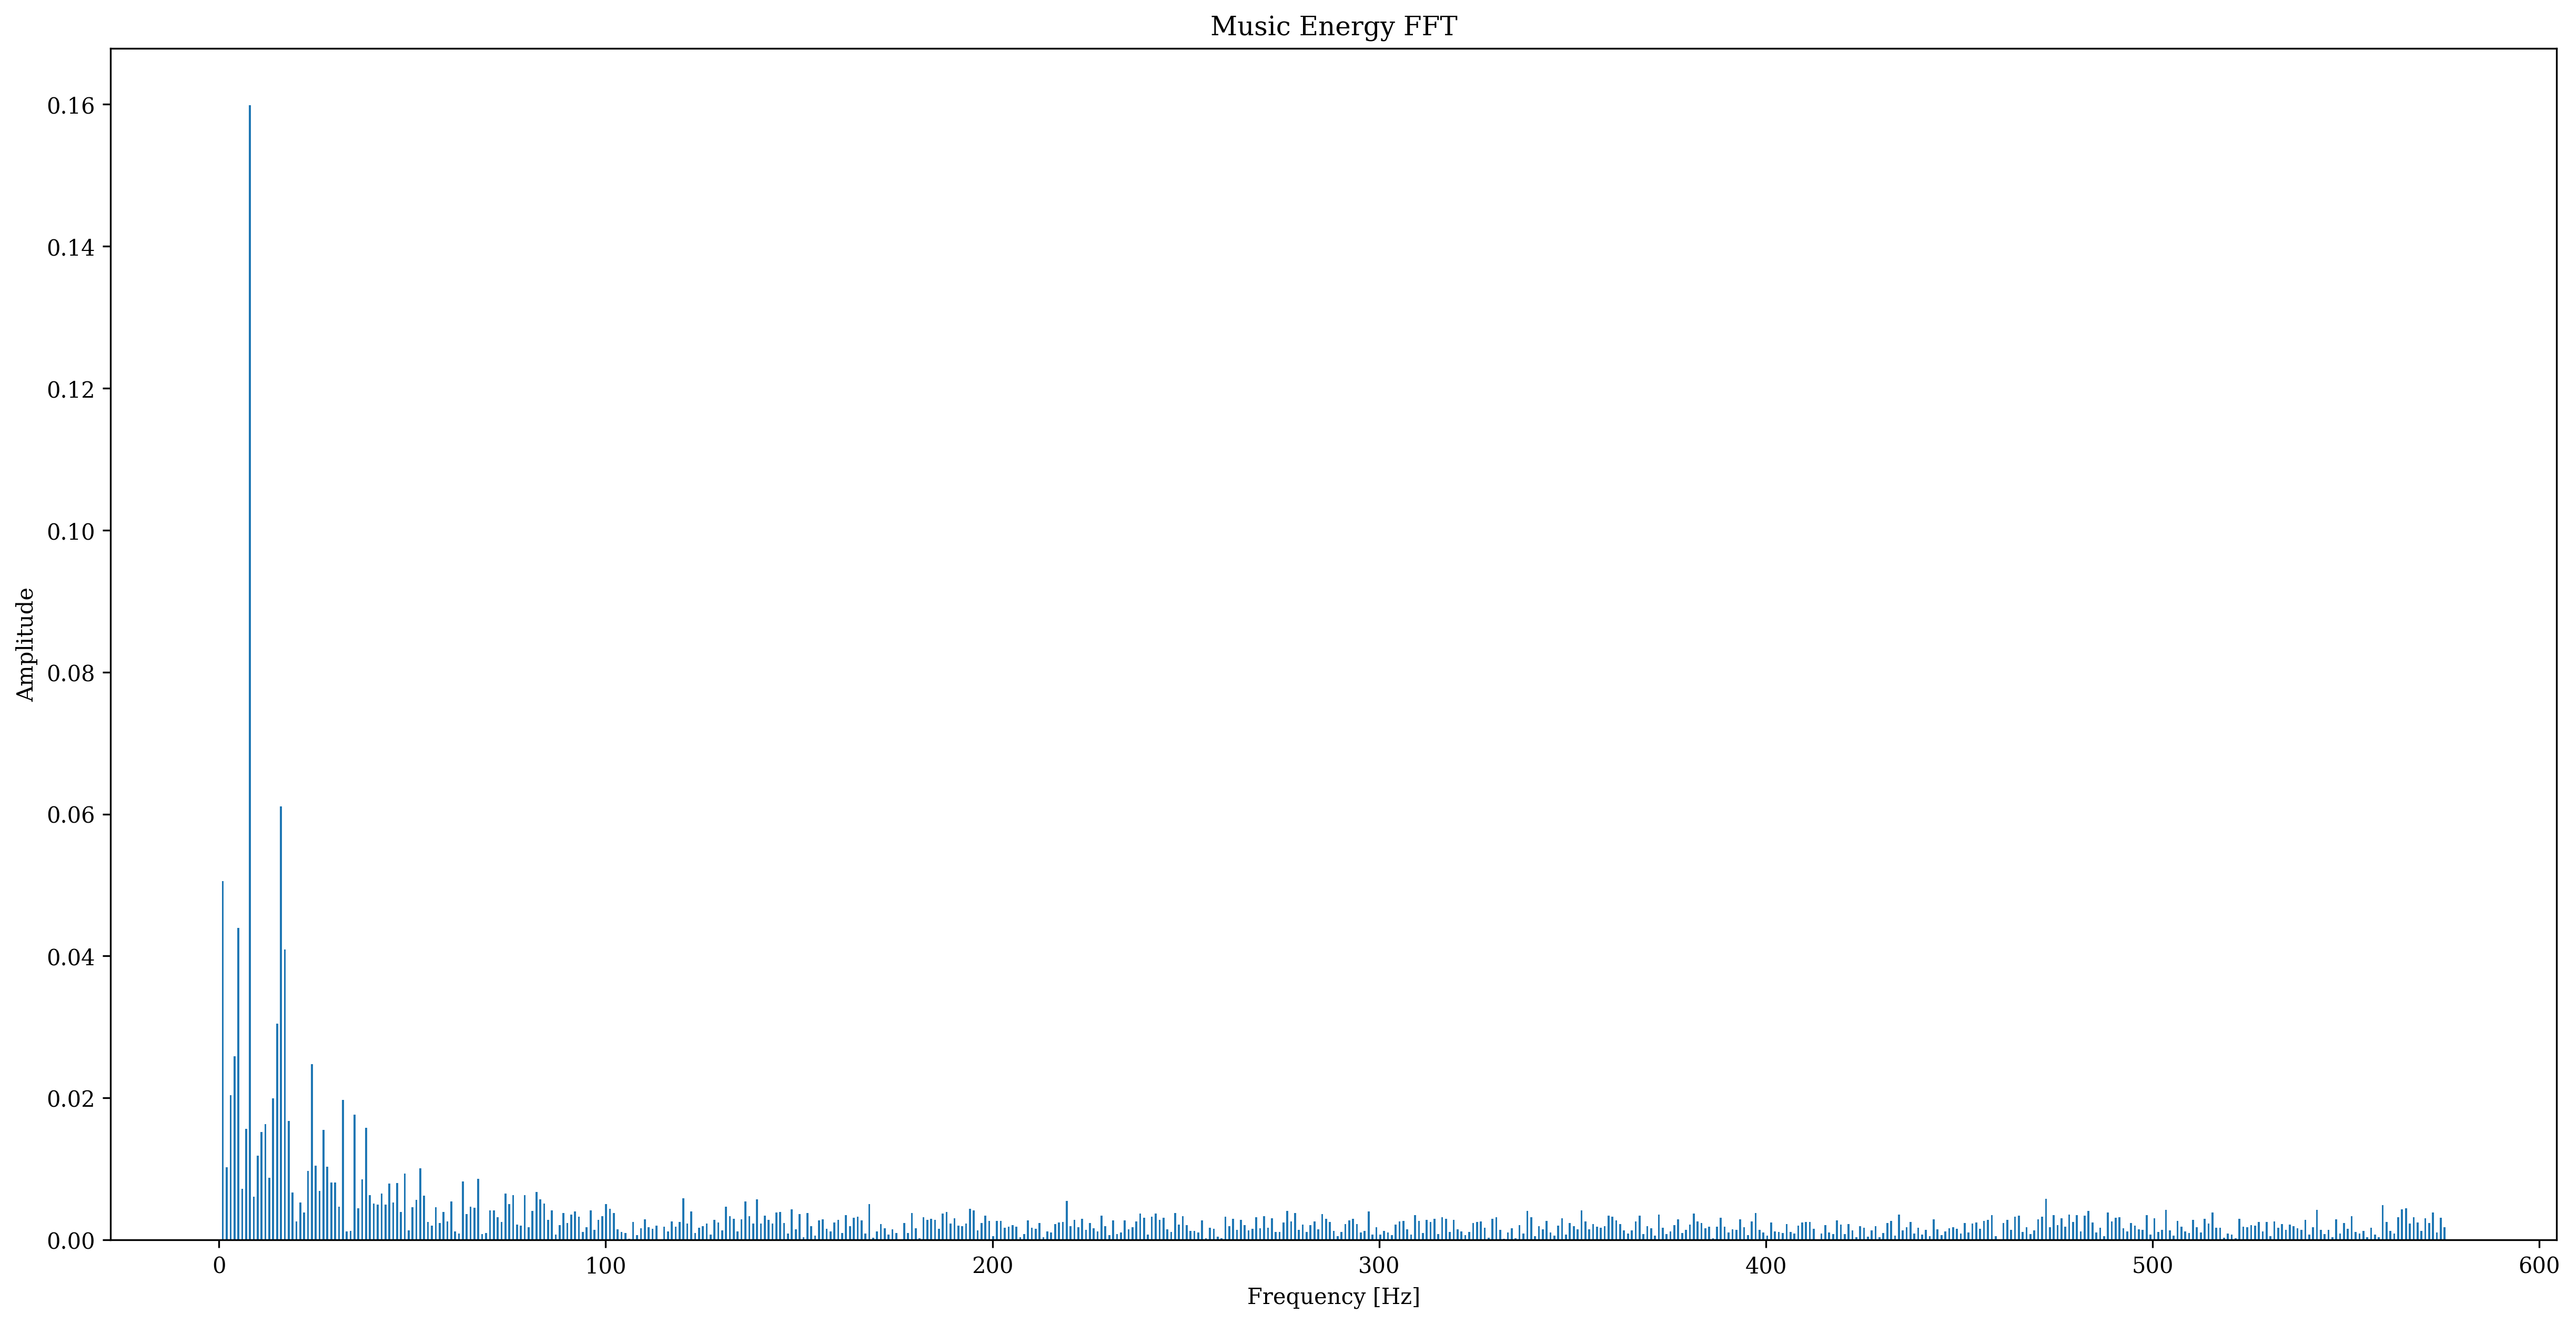

In [11]:
wt = weather["Temperature"]
wh = weather["Humidity"]
me = music["Energy"]

fft1 = np.fft.fft(wt)
fft2 = np.fft.fft(wh)
fft3 = np.fft.fft(me)

T = 48  # Daily

N1 = wt.size
N2 = wh.size
N3 = me.size

f1 = np.linspace(0, N1, N1)
f2 = np.linspace(0, N2, N2)
f3 = np.linspace(0, N3, N3)

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f1[1:N1 // 2], np.abs(fft1)[1:N1 // 2] * 1 / N1, width=.5)  # 1 / N is a normalization factor
plt.title("Temperature FFT")
plt.show()

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f2[1:N2 // 2], np.abs(fft2)[1:N2 // 2] * 1 / N2, width=.5)
plt.title("Humidity FFT")
plt.show()

plt.ylabel("Amplitude")
plt.xlabel("Frequency [Hz]")
plt.bar(f1[1:N3 // 2], np.abs(fft3)[1:N3 // 2] * 1 / N3, width=.5)
plt.title("Music Energy FFT")
plt.show()

## Cross Correlation

A complete cross-correlation analysis, particularly focusing on the correlation of the music track energy against weather metrics.

In [14]:
from scipy.stats import spearmanr
from scipy.stats import pearsonr
from matplotlib import pyplot

corr1, _ = spearmanr(weather['Temperature'], weather['Humidity'])
print('Spearmans correlation of temperature and humidity: %.3f' % corr1)

corr2, _ = spearmanr(weather['Temperature'], music['Energy'])
print('Spearmans correlation of temperature and energy: %.3f' % corr2)

corr3, _ = spearmanr(weather['Humidity'], music['Energy'])
print('Spearmans correlation of humidity and energy: %.3f' % corr3)


def plot_scatter_matrix(data):
    dim = len(data.columns.values)
    fig, axs = newfigure(dim, dim, sharex='col', sharey='row', figsize=(10,10))
    fig.tight_layout()
    for row, iname in enumerate(data.columns.values):
        for col, jname in enumerate(data.columns.values):
            axs[row,col].scatter(data[jname], data[iname], s=5)
            if col == 0:
                axs[row,col].set_ylabel(iname)
            if row == len(data.columns.values)-1:
                axs[row,col].set_xlabel(jname)  
    return fig, axs

Spearmans correlation of temperature and humidity: -0.302
Spearmans correlation of temperature and energy: 0.162
Spearmans correlation of humidity and energy: -0.240


### Weather Correlation

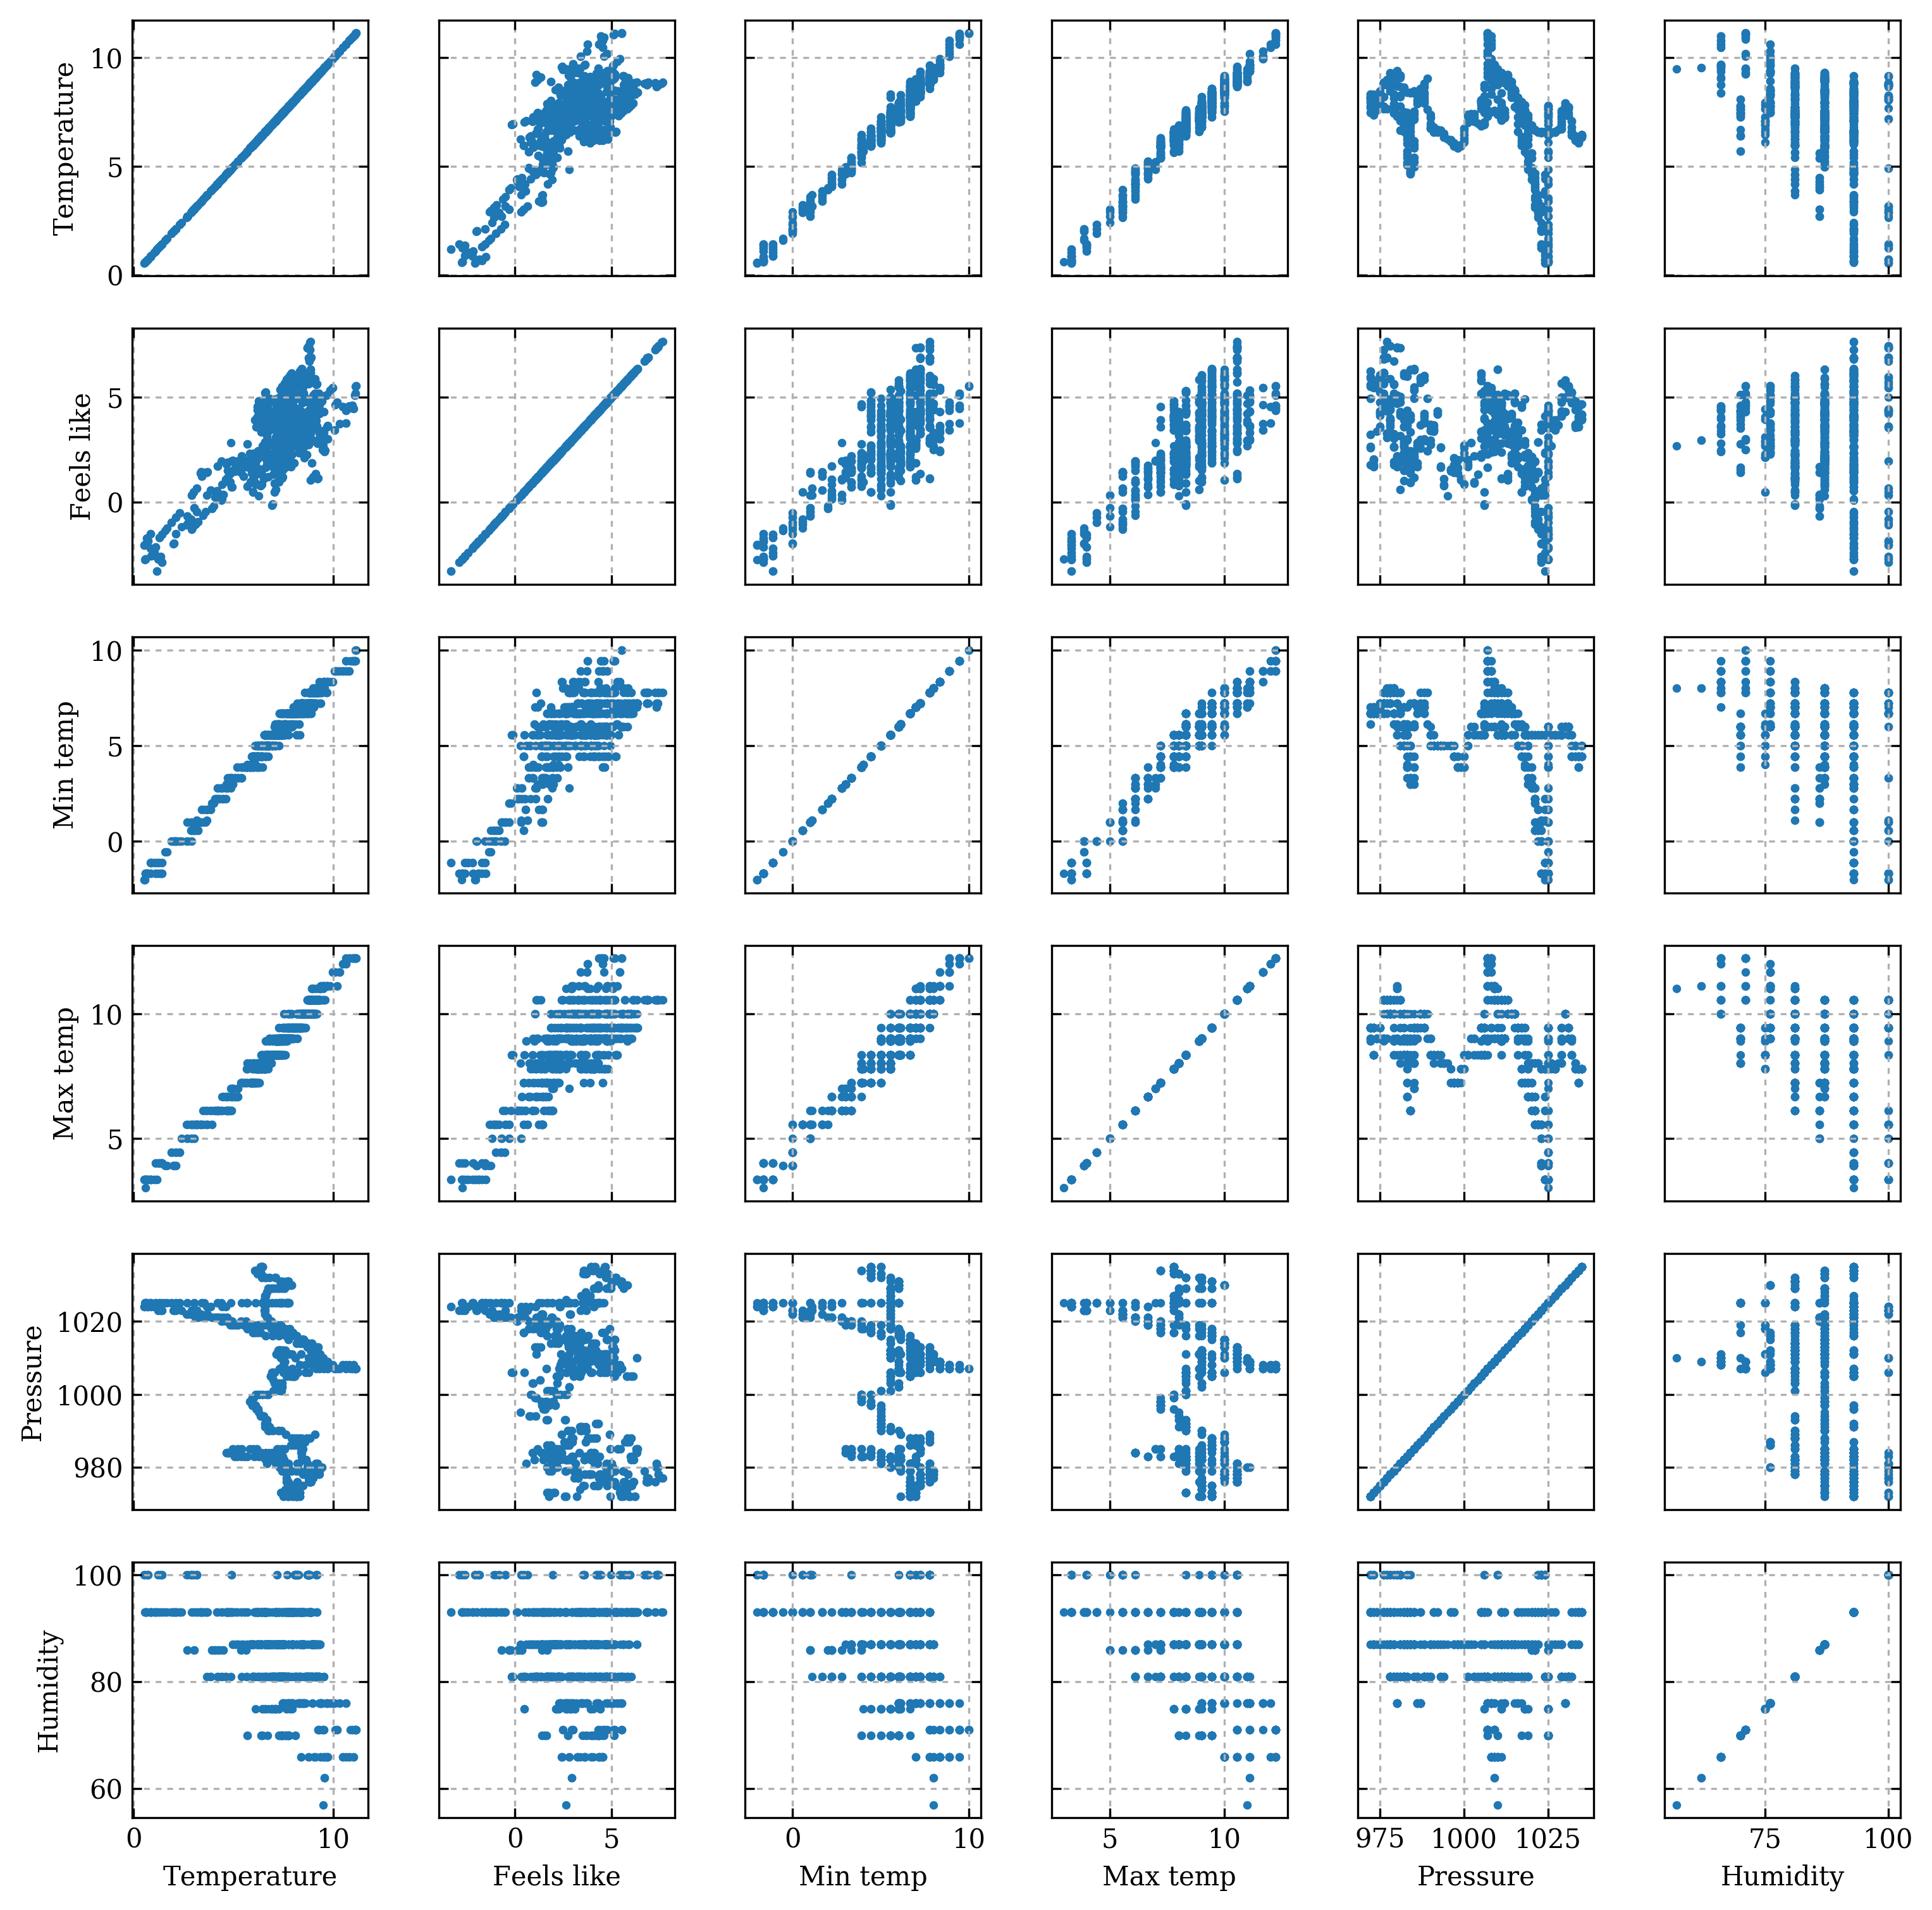

In [15]:
fig, axs = plot_scatter_matrix(weather)
plt.show()

### Music Correlation

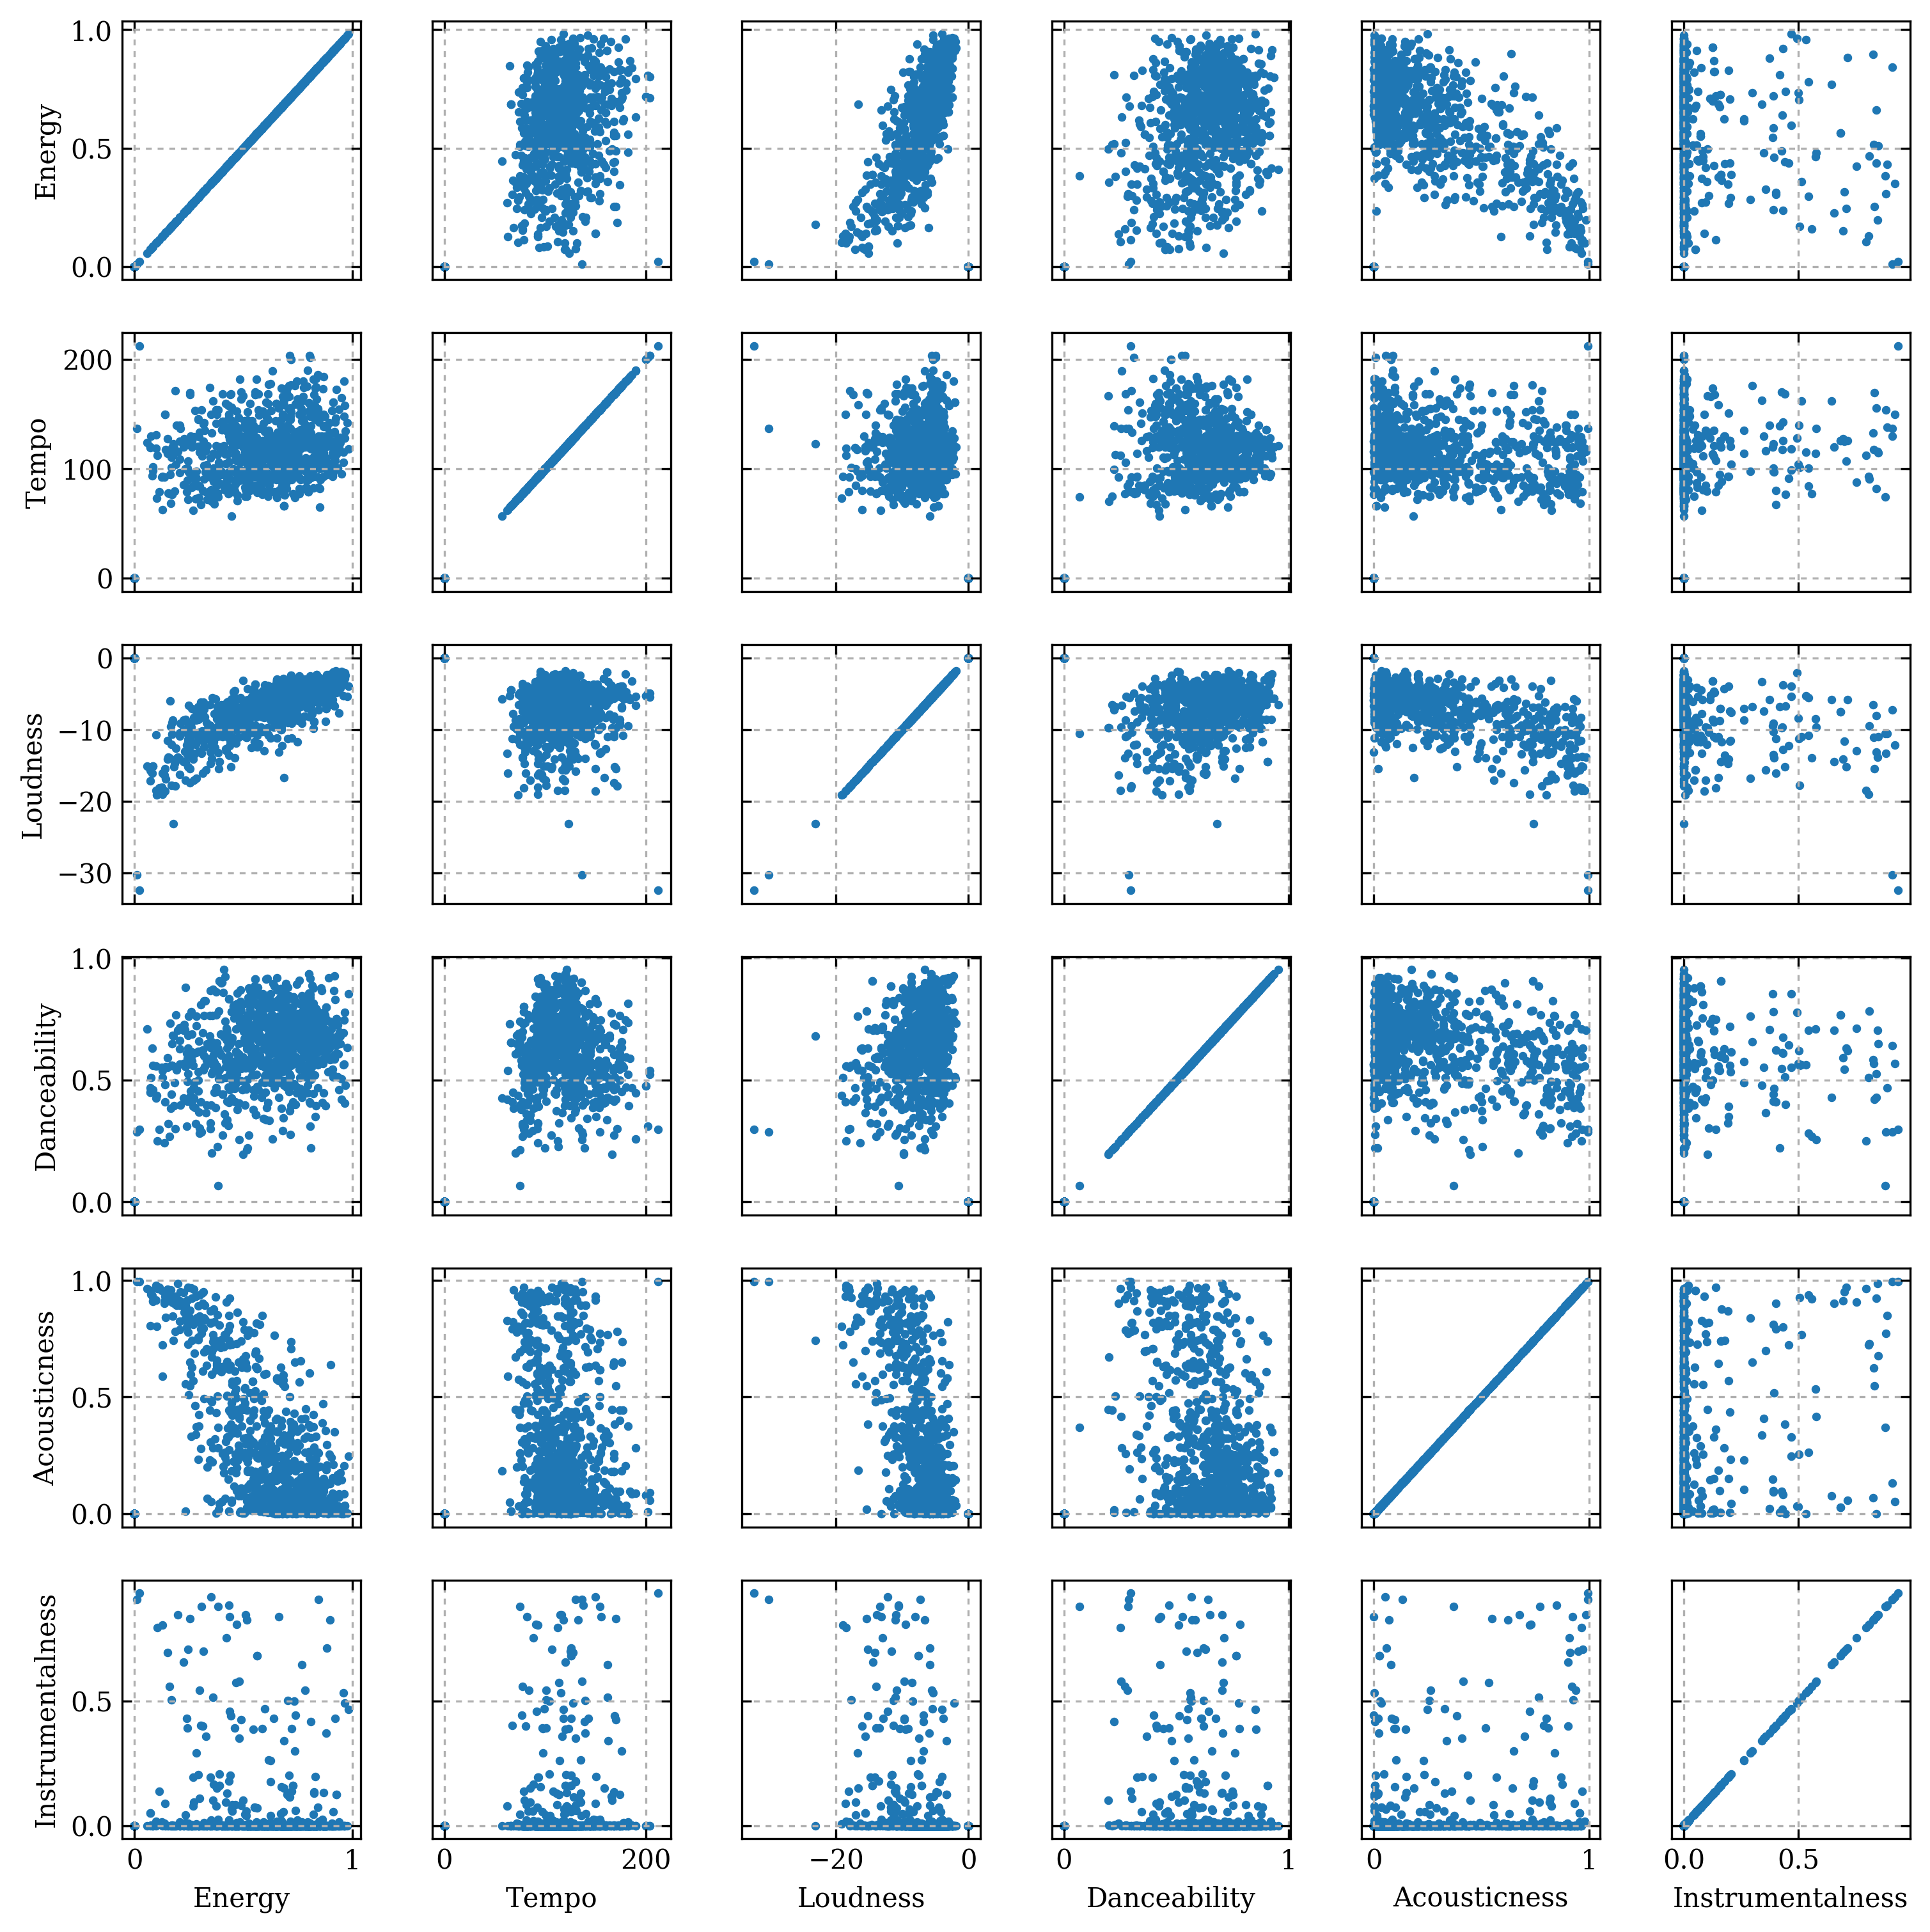

In [16]:
fig, axs = plot_scatter_matrix(music)
plt.show()

### Weather and Music Correlation

The cross-correlation between temperature, humidity and music energy were looked into.

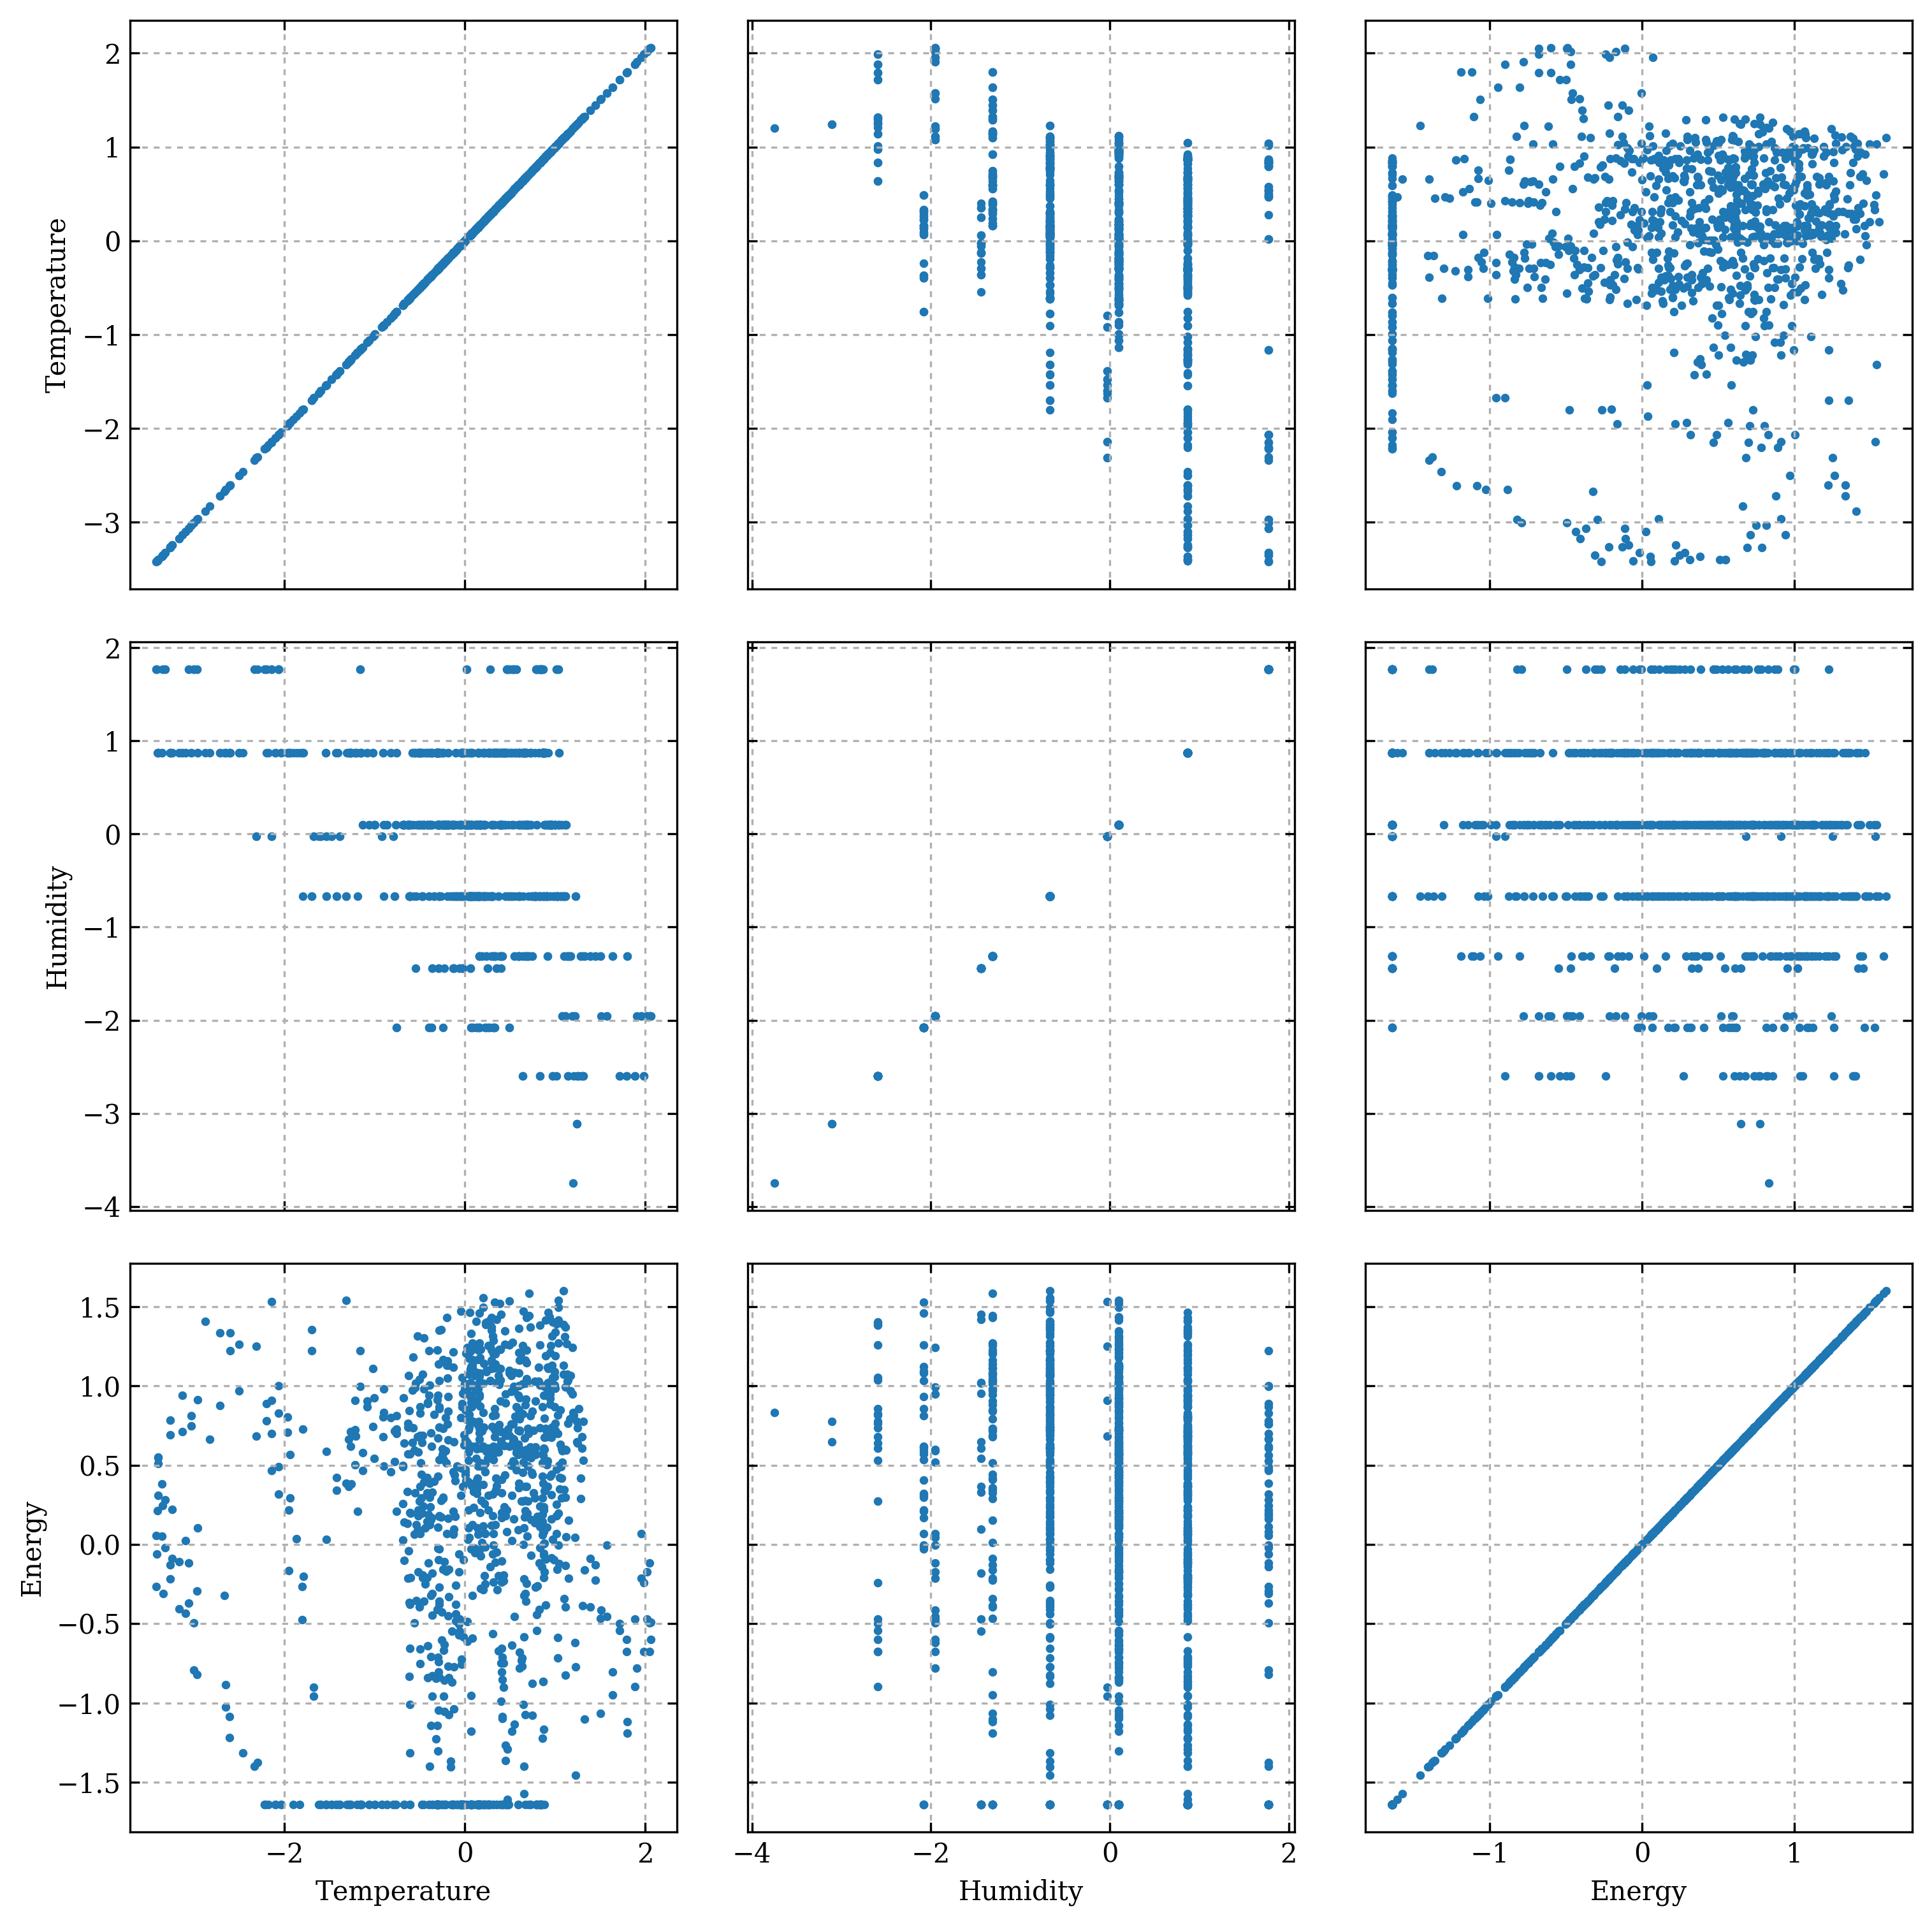

In [18]:
fig, axs = plot_scatter_matrix(ndata2)
plt.show()